# Optimization Project

## Comparison of SGD an SFW with different Learning Rates

In [1]:
!pip install ucimlrepo
!pip install --upgrade certifi

In [2]:
import itertools
import ssl
import math
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo

2024-01-30 14:26:06.290113: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-30 14:26:06.290270: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-30 14:26:06.435858: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
print("Tensorflow version: ", tf.__version__)

Tensorflow version:  2.15.0


In [4]:
print("List GPU devices: ", tf.config.list_physical_devices('GPU'))

List GPU devices:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## A Simple DNN with 2 Hidden Layer on A Multivariate Dataset with 7 Classes

# Dry Bean Dataset Description

## Dataset Overview
- **Number of Instances:** 13,611
- **Number of Features:** 16
- **Feature Types:** Integer, Real
- **Subject Area:** Biology
- **Associated Tasks:** Classification
- **Data Type:** Multivariate

## Dataset Information
This dataset consists of images capturing 13,611 grains of seven different registered dry beans, taken with a high-resolution camera. The primary purpose of the dataset is to support classification tasks, specifically to distinguish between seven varieties of dry beans based on various features related to form, shape, type, and structure.

## Features
1. **Area (A):** The area of a bean zone and the number of pixels within its boundaries.
2. **Perimeter (P):** Bean circumference, defined as the length of its border.
3. **Major Axis Length (L):** Distance between the ends of the longest line that can be drawn from a bean.
4. **Minor Axis Length (l):** The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5. **Aspect Ratio (K):** Defines the relationship between L and l.
6. **Eccentricity (Ec):** Eccentricity of the ellipse having the same moments as the region.
7. **Convex Area (C):** Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8. **Equivalent Diameter (Ed):** The diameter of a circle having the same area as a bean seed area.
9. **Extent (Ex):** The ratio of the pixels in the bounding box to the bean area.
10. **Solidity (S):** Also known as convexity, the ratio of the pixels in the convex shell to those found in beans.
11. **Roundness (R):** Calculated with the formula: (4πA)/(P^2).
12. **Compactness (CO):** Measures the roundness of an object: Ed/L.
13. **ShapeFactor1 (SF1):** Feature.
14. **ShapeFactor2 (SF2):** Feature.
15. **ShapeFactor3 (SF3):** Feature.
16. **ShapeFactor4 (SF4):** Feature.

## Target Variable
- **Class:** Categorical variable indicating the type of dry bean. Possible classes are Seker, Barbunya, Bombay, Cali, Dermosan, Horoz, and Sira.

## Units and Missing Values
- Units are specified for relevant features.
- No missing values are reported in the provided information.

## Dataset Creation and Purpose
This dataset was curated to develop a classification model capable of distinguishing between different varieties of dry beans based on high-resolution images and extracted features. The features include both geometrical dimensions and shape forms, providing a comprehensive set for robust classification.



In [4]:
# fetch dataset 
dry_bean_dataset = fetch_ucirepo(id=602) 
  
# data (as pandas dataframes) 
X = dry_bean_dataset.data.features 
y = dry_bean_dataset.data.targets

In [7]:
class_names = ['Seker', 'Barbunya', 'Bombay', 'Cali', 'Dermosan', 'Horoz', 'Sira']

In [8]:
X = X.values
y = y.values

In [5]:
def normalize_features(input_data):
    return StandardScaler().fit_transform(input_data)

def one_hot_label_encoder(input_data):
    return OneHotEncoder().fit_transform(input_data.reshape(-1, 1)).toarray()

In [10]:
X = normalize_features(X)
y = one_hot_label_encoder(y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [6]:
def plot_loss_curve(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper right')
    plt.show()
    return

def plot_accuracy_curve(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='lower right')
    plt.show()
    return

def plot_precision_curve(history):
    plt.plot(history.history['precision'])
    plt.plot(history.history['val_precision'])
    plt.title('Model Precision')
    plt.ylabel('Precision')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='lower right')
    plt.show()
    return

def plot_recall_curve(history):
    plt.plot(history.history['recall'])
    plt.plot(history.history['val_recall'])
    plt.title('Model Recall')
    plt.ylabel('Recall')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='lower right')
    plt.show()
    return


def plot_confusion_matrix(dnn_model, features, targets, classes, dataset):
    y_test_preds = dnn_model.predict(features, verbose='auto', steps=test_steps)
    y_test_preds = np.argmax(y_test_preds, axis=1)
    y_test = np.argmax(targets, axis=1)
    if dataset == 'cifar10':
        cm = confusion_matrix(y_test, y_test_preds, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8])
    elif dataset == 'dry_bean':
        cm = confusion_matrix(y_test, y_test_preds, labels=[0, 1, 2, 3, 4, 5, 6])
    else:
        raise ValueError('dataset should be one of cifar10 or dry_bean.')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Oranges)
    plt.title('Confusion Matrix')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.colorbar()
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    return

In [13]:
batch_size = 32

train_steps = np.ceil(X_train.shape[0] / batch_size)
test_steps = np.ceil(X_test.shape[0] / batch_size)
val_steps = np.ceil(X_val.shape[0] / batch_size)

In [7]:
def get_f1_score(p, r):
    precision = p.result().numpy()
    recall = r.result().numpy()
    return 2 * (precision * recall) / (precision + recall)

In [15]:
def create_dnn_model(input_shape, num_of_hidden, units, activations, num_of_classes):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=(input_shape,)))
    for i in range(num_of_hidden):
        model.add(tf.keras.layers.Dense(units[i], activations[i]))
    if num_of_classes == 1:
        model.add(tf.keras.layers.Dense(num_of_classes, activation='linear'))    
        return model
    elif num_of_classes == 2:
        model.add(tf.keras.layers.Dense(num_of_classes, activation='sigmoid'))    
        return model
    model.add(tf.keras.layers.Dense(num_of_classes, activation='softmax'))    
    return model

In [16]:
def reset_model_parameters(model):
    for layer in model.layers:
        layer.set_weights([
            tf.keras.initializers.GlorotUniform()(shape=layer.get_weights()[0].shape),
            tf.zeros_like(layer.get_weights()[1])
        ])
    print('All model parameters have been reinitilized.')        
    return

In [8]:
precision_metric = tf.keras.metrics.Precision()
recall_metric = tf.keras.metrics.Recall()

In [9]:
learning_rates = []

In [10]:
class PrintLearningRateCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        learning_rate = self.model.optimizer.lr.numpy()
        print(f"\nLearning Rate at the end of epoch {epoch + 1}: {learning_rate}\n")
        learning_rates.append(learning_rate)
            

In [11]:
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_recall',
    mode='max',
    patience=5,      
    restore_best_weights=True,
    verbose=1
)

### SGD as optimizer

In [21]:
model = create_dnn_model(input_shape=X_train.shape[1], num_of_hidden=2, units=[16, 8], activations=['relu', 'relu'], num_of_classes=len(class_names))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 7)                 63        
                                                                 
Total params: 471 (1.84 KB)
Trainable params: 471 (1.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy', precision_metric, recall_metric])

In [24]:
model_history = model.fit(X_train, y_train, batch_size=batch_size, epochs=20, shuffle=True,
                          validation_data=(X_val, y_val),
                          steps_per_epoch=train_steps, validation_steps=val_steps, callbacks=[PrintLearningRateCallback()], verbose='auto')

Epoch 1/20
261/273 [===========================>..] - ETA: 0s - loss: 1.7777 - accuracy: 0.3544 - precision: 0.7778 - recall: 8.3812e-04   
Learning Rate at the end of epoch 1: 0.009999999776482582

273/273 [==============================] - 3s 5ms/step - loss: 1.7687 - accuracy: 0.3605 - precision: 0.9000 - recall: 0.0021 - val_loss: 1.5066 - val_accuracy: 0.5496 - val_precision: 0.9884 - val_recall: 0.0390
Epoch 2/20
273/273 [==============================] - ETA: 0s - loss: 1.2489 - accuracy: 0.5927 - precision: 0.9678 - recall: 0.2584
Learning Rate at the end of epoch 2: 0.009999999776482582

273/273 [==============================] - 1s 4ms/step - loss: 1.2489 - accuracy: 0.5927 - precision: 0.9678 - recall: 0.2584 - val_loss: 0.9848 - val_accuracy: 0.6616 - val_precision: 0.9531 - val_recall: 0.4949
Epoch 3/20
258/273 [===========================>..] - ETA: 0s - loss: 0.7963 - accuracy: 0.7541 - precision: 0.9315 - recall: 0.5732
Learning Rate at the end of epoch 3: 0.00999999977

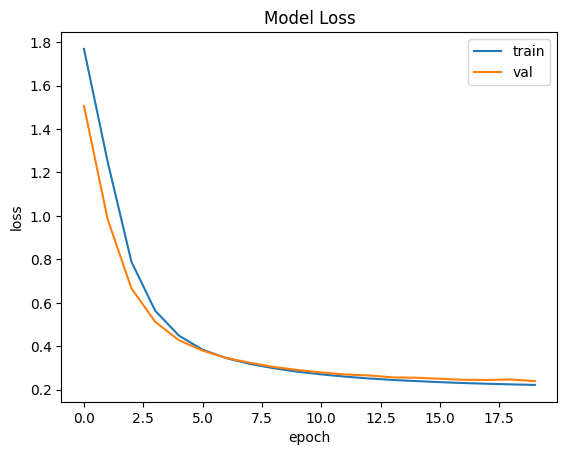

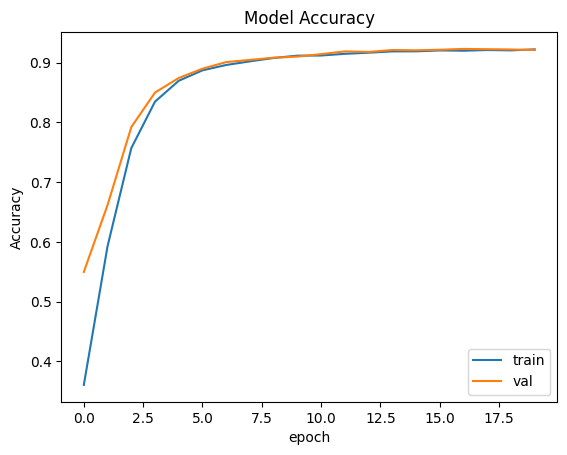

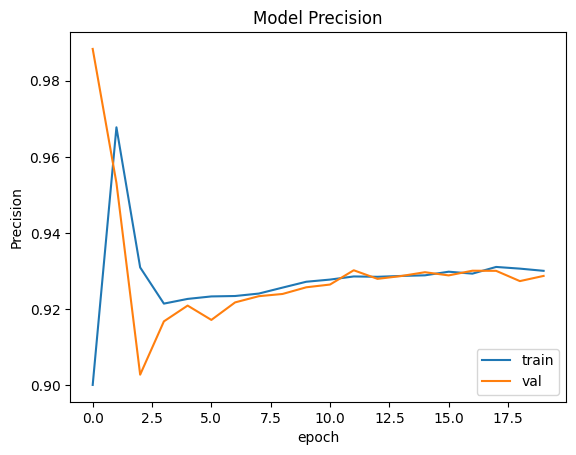

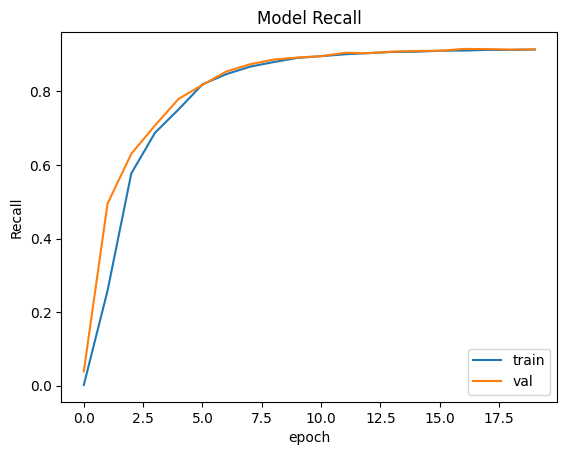

86/86 [==============================] - 0s 1ms/step


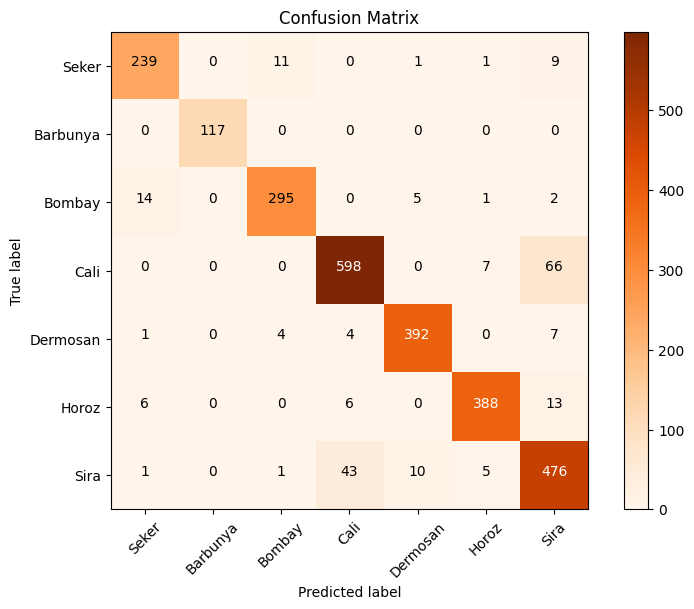

86/86 [==============================] - 0s 3ms/step - loss: 0.2289 - accuracy: 0.9199 - precision: 0.9284 - recall: 0.9141
DNN model classifier evaluation results with SGD optimizer:

Test set Loss = 0.22893
Test set Accuracy = 0.92
Test set Precision = 0.93
Test set Recall = 0.91
Test set F1 Score = 0.92


In [25]:
plot_loss_curve(model_history)
plot_accuracy_curve(model_history)
plot_precision_curve(model_history)
plot_recall_curve(model_history)

plot_confusion_matrix(model, X_test, y_test, classes=class_names, dataset='dry_bean')

model_score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose='auto', steps=test_steps)
print("DNN model classifier evaluation results with SGD optimizer:\n")
print('Test set Loss = {:.5f}'.format(model_score[0]))
print('Test set Accuracy = {:.2f}'.format(model_score[1]))
print('Test set Precision = {:.2f}'.format(model_score[2]))
print('Test set Recall = {:.2f}'.format(model_score[3]))
print('Test set F1 Score = {:.2f}'.format(get_f1_score(precision_metric, recall_metric)))

In [26]:
reset_model_parameters(model)

All model parameters have been reinitilized.


### Stochastic Frank-Wolfe with L1 ball as feasible region as optimizer

In [12]:
class MyLearningRateSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, initial_learning_rate, method, params):
        self.initial_learning_rate = initial_learning_rate
        self.method = method
        self.params = params

    def __call__(self, step):
        if self.method == "FIX":
            return self.initial_learning_rate

        elif self.method == "STEP":
            gamma = self.params.get("gamma")
            l = self.params.get("l")
            return self.initial_learning_rate * tf.pow(gamma, tf.math.floor(tf.cast(step, tf.float32) / l))

        elif self.method == "EXP":
            gamma = self.params.get("gamma")
            return self.initial_learning_rate * tf.pow(gamma, tf.cast(step, tf.float32))

        elif self.method == "INV":
            gamma = self.params.get("gamma")
            p = self.params.get("p")
            return self.initial_learning_rate / tf.pow((1 + (gamma * tf.cast(step, tf.float32))), p)

        elif self.method == "POLY":
            l = self.params.get("l")
            p = self.params.get("p")
            return self.initial_learning_rate * tf.pow((1 - (tf.cast(step, tf.float32) / l)), p)

        elif self.method in ["TRI", "TRI2", "TRIEXP", "SIN", "SIN2", "SINEXP", "COS"]:
            l = self.params.get("l")
            k0 = self.initial_learning_rate
            k1 = self.params.get("k1")
            gamma = self.params.get("gamma")
            if self.method == "TRI":
                return k0 + (k1 - k0) * tf.abs(
                    tf.math.asin(tf.math.sin(math.pi * tf.cast(step, tf.float32) / (2 * l)))) / (2 / math.pi)

            elif self.method == "TRI2":
                return k0 + (k1 - k0) * (1 / (tf.pow(2, tf.math.floor(tf.cast(step, tf.float32) / (2 * l))))) * tf.abs(
                    tf.math.asin(tf.math.sin(math.pi * tf.cast(step, tf.float32) / (2 * l)))) / (2 / math.pi)

            elif self.method == "TRIEXP":
                return (k0 + (k1 - k0) * tf.abs(
                    tf.math.asin(tf.math.sin(math.pi * tf.cast(step, tf.float32) / (2 * l)))) / (
                                math.pi / 2)) * tf.pow(gamma, tf.cast(step, tf.float32))

            elif self.method == "SIN":
                return k0 + (k1 - k0) * tf.abs(tf.math.sin(math.pi * tf.cast(step, tf.float32) / (2 * l)))

            elif self.method == "SIN2":
                return k0 + (k1 - k0) * (1 / (tf.pow(2, tf.math.floor(tf.cast(step, tf.float32) / (2 * l))))) * tf.abs(
                    tf.math.sin(math.pi * tf.cast(step, tf.float32) / (2 * l)))

            elif self.method == "SINEXP":
                return (k0 + (k1 - k0) * tf.abs(
                    tf.math.sin(math.pi * tf.cast(step, tf.float32) / (2 * l)))) * tf.pow(gamma,
                                                                                          tf.cast(step, tf.float32))

            elif self.method == "COS":
                return k0 + (k1 - k0) * 0.5 * (1 + tf.math.cos(math.pi * 2 * tf.cast(step, tf.float32) / l))

        else:
            raise ValueError("The given method does not exist.")

    def get_config(self):
        return {
            'initial_learning_rate': self.initial_learning_rate,
            'method': self.method,
            'params': self.method
        }

    @classmethod
    def from_config(cls, config):
        return cls(**config)

In [13]:
class StochasticFrankWolfe(tf.keras.optimizers.Optimizer):
    def __init__(
            self,
            learning_rate,
            momentum=0.9,
            nesterov=False,
            weight_decay=None,
            clipnorm=None,
            clipvalue=None,
            global_clipnorm=None,
            use_ema=False,
            ema_momentum=0.99,
            ema_overwrite_frequency=None,
            jit_compile=True,
            name="StochasticFrankWolfe",
            **kwargs
    ):
        super().__init__(
            name=name,
            weight_decay=weight_decay,
            clipnorm=clipnorm,
            clipvalue=clipvalue,
            global_clipnorm=global_clipnorm,
            use_ema=use_ema,
            ema_momentum=ema_momentum,
            ema_overwrite_frequency=ema_overwrite_frequency,
            jit_compile=jit_compile,
            **kwargs
        )
        self._learning_rate = self._build_learning_rate(learning_rate)
        self.momentum = momentum
        if isinstance(momentum, (int, float)) and (momentum < 0 or momentum > 1):
            raise ValueError("`momentum` must be between [0, 1].")

    def build(self, var_list):
        super().build(var_list)
        if hasattr(self, "_built") and self._built:
            return
        self._built = True
        self.momentums = []
        for var in var_list:
            self.momentums.append(
                self.add_variable_from_reference(
                    model_variable=var, variable_name="m"
                )
            )
    
    def update_step(self, gradient, variable):
        # Cast the learning rate and the iteration count to the dtype of the variable
        lr = tf.cast(self.learning_rate, variable.dtype)  # Corresponds to αt in Algorithm 1
        local_step = tf.cast(self.iterations + 1, variable.dtype)  # Corresponds to t in Algorithm 1

        # Compute the step size as learning rate divided by the iteration count
        step_size = lr / local_step  # This is a common way to decay the learning rate in stochastic optimization algorithms

        # Cast the momentum to the dtype of the variable
        momentum = tf.cast(self.momentum, variable.dtype)  # Corresponds to ρt in Algorithm 1

        # Get the momentum variable for this variable
        m = self.momentums[self._index_dict[self._var_key(variable)]]  # Corresponds to mt in Algorithm 1

        # Scale the gradient by its L1 norm
        scaled_gradient = gradient / tf.norm(gradient, ord=1)  # This is a specific choice made in your implementation, not directly specified in Algorithm 1

        # Update the momentum variable with the current gradient and the previous momentum
        m.assign((1. - momentum) * scaled_gradient + momentum * m)  # Corresponds to Line 5 in Algorithm 1

        # Compute the direction of the update as the sign of the negative momentum
        v = tf.sign(-m)  # Corresponds to Line 6 in Algorithm 1, assuming the feasible region C is the L1 ball

        # Perform the update
        if isinstance(gradient, tf.IndexedSlices):
            # If the gradient is sparse, perform a sparse update
            indices = gradient.indices
            updates = step_size * (v - variable)
            variable.scatter_nd_update(indices[:, None], updates)  # This is a TensorFlow-specific way to handle sparse updates
        else:
            # If the gradient is dense, perform a dense update
            variable.assign_add(step_size * (v - variable))  # Corresponds to Line 7 in Algorithm 1

 
    def get_config(self):
        config = super().get_config()
        config.update(
            {
                "learning_rate": self._serialize_hyperparameter(
                    self._learning_rate
                ),
                "momentum": self.momentum,
            }
        )
        return config

In [37]:
#FIX
model.compile(
    optimizer=StochasticFrankWolfe(learning_rate=MyLearningRateSchedule(initial_learning_rate=0.1, method='FIX', params={})),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy', precision_metric, recall_metric])

In [38]:
model_history = model.fit(X_train, y_train, batch_size=batch_size, epochs=20, shuffle=True,
                          validation_data=(X_val, y_val),
                          steps_per_epoch=train_steps, validation_steps=val_steps,  callbacks=[PrintLearningRateCallback()], verbose='auto')

Epoch 1/20
272/273 [============================>.] - ETA: 0s - loss: 0.5041 - accuracy: 0.8208 - precision: 0.8932 - recall: 0.7203
Learning Rate at the end of epoch 1: 0.10000000149011612

273/273 [==============================] - 2s 5ms/step - loss: 0.5040 - accuracy: 0.8208 - precision: 0.8932 - recall: 0.7204 - val_loss: 0.3991 - val_accuracy: 0.8719 - val_precision: 0.8926 - val_recall: 0.8017
Epoch 2/20
257/273 [===========================>..] - ETA: 0s - loss: 0.3628 - accuracy: 0.8799 - precision: 0.9037 - recall: 0.8238
Learning Rate at the end of epoch 2: 0.10000000149011612

273/273 [==============================] - 1s 4ms/step - loss: 0.3628 - accuracy: 0.8800 - precision: 0.9038 - recall: 0.8242 - val_loss: 0.3590 - val_accuracy: 0.8871 - val_precision: 0.9044 - val_recall: 0.8466
Epoch 3/20
261/273 [===========================>..] - ETA: 0s - loss: 0.3368 - accuracy: 0.8892 - precision: 0.9111 - recall: 0.8512
Learning Rate at the end of epoch 3: 0.10000000149011612

2

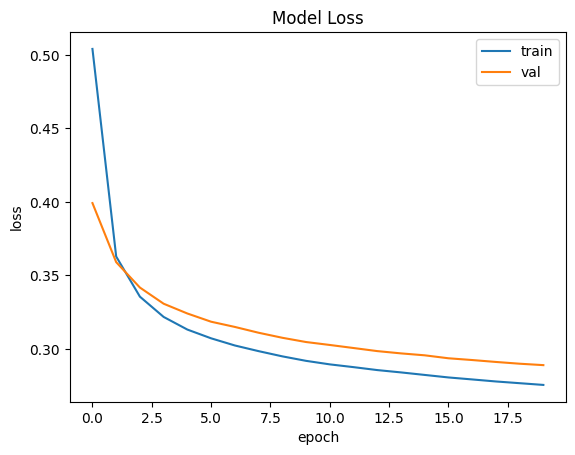

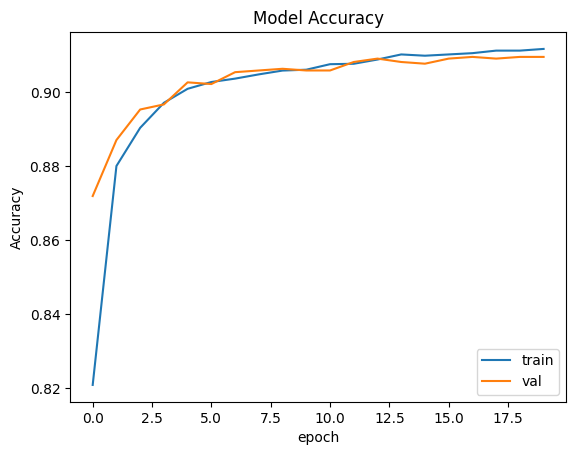

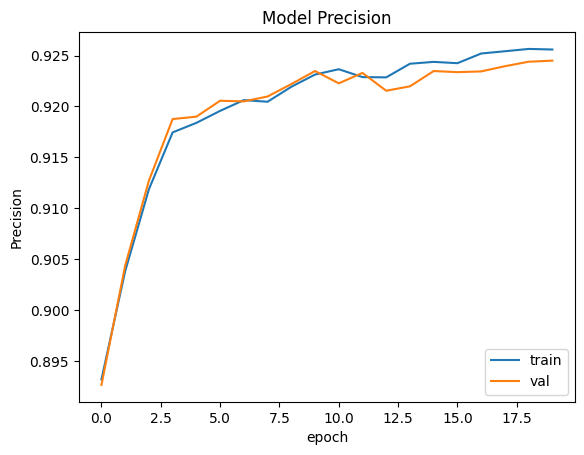

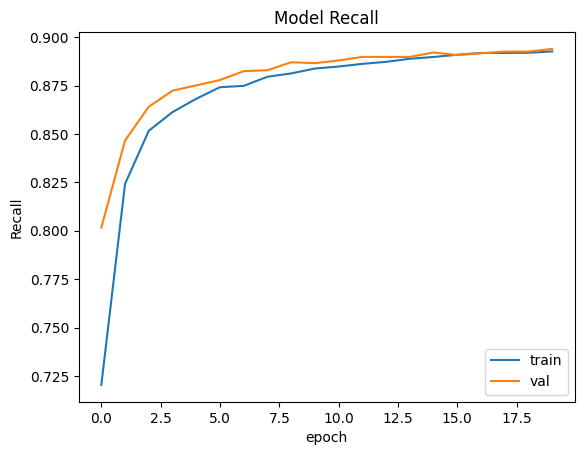

86/86 [==============================] - 0s 1ms/step


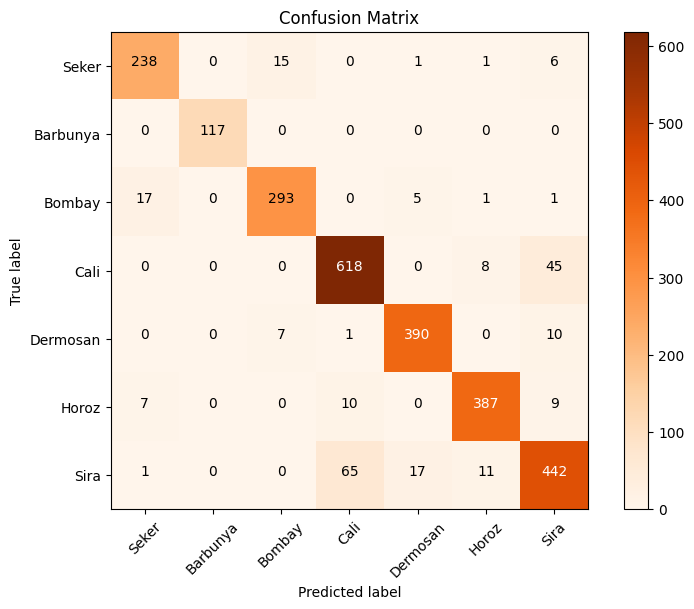

86/86 [==============================] - 0s 3ms/step - loss: 0.2744 - accuracy: 0.9126 - precision: 0.9258 - recall: 0.8975
DNN model classifier evaluation results with StochasticFrankWolfe optimizer and FIX Learning Rate:

Test set Loss = 0.27441
Test set Accuracy = 0.91
Test set Precision = 0.93
Test set Recall = 0.90
Test set F1 Score = 0.91


In [39]:
plot_loss_curve(model_history)
plot_accuracy_curve(model_history)
plot_precision_curve(model_history)
plot_recall_curve(model_history)

plot_confusion_matrix(model, X_test, y_test, classes=class_names, dataset='dry_bean')

model_score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose='auto', steps=test_steps)
print("DNN model classifier evaluation results with StochasticFrankWolfe optimizer and FIX Learning Rate:\n")
print('Test set Loss = {:.5f}'.format(model_score[0]))
print('Test set Accuracy = {:.2f}'.format(model_score[1]))
print('Test set Precision = {:.2f}'.format(model_score[2]))
print('Test set Recall = {:.2f}'.format(model_score[3]))
print('Test set F1 Score = {:.2f}'.format(get_f1_score(precision_metric, recall_metric)))

In [66]:
reset_model_parameters(model)

All model parameters have been reinitilized.


In [67]:
#EXP
model.compile(
    optimizer=StochasticFrankWolfe(learning_rate=MyLearningRateSchedule(initial_learning_rate=0.1, method='EXP', params={'gamma': 0.9999})),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=['accuracy', precision_metric, recall_metric])

In [68]:
model_history = model.fit(X_train, y_train, batch_size=batch_size, epochs=50, shuffle=True,
                          validation_data=(X_val, y_val),
                          steps_per_epoch=train_steps, validation_steps=val_steps, callbacks=[PrintLearningRateCallback()], verbose='auto')

Epoch 1/50
269/273 [============================>.] - ETA: 0s - loss: 0.2412 - accuracy: 0.6059 - precision: 0.7848 - recall: 0.5391
Learning Rate at the end of epoch 1: 0.09731607884168625

273/273 [==============================] - 2s 5ms/step - loss: 0.2406 - accuracy: 0.6069 - precision: 0.7847 - recall: 0.5400 - val_loss: 0.1991 - val_accuracy: 0.6497 - val_precision: 0.7764 - val_recall: 0.6185
Epoch 2/50
273/273 [==============================] - ETA: 0s - loss: 0.1842 - accuracy: 0.6793 - precision: 0.7950 - recall: 0.6303
Learning Rate at the end of epoch 2: 0.09469473361968994

273/273 [==============================] - 1s 4ms/step - loss: 0.1842 - accuracy: 0.6793 - precision: 0.7950 - recall: 0.6303 - val_loss: 0.1782 - val_accuracy: 0.6901 - val_precision: 0.7861 - val_recall: 0.6396
Epoch 3/50
273/273 [==============================] - ETA: 0s - loss: 0.1701 - accuracy: 0.7219 - precision: 0.8011 - recall: 0.6535
Learning Rate at the end of epoch 3: 0.09214399009943008

2

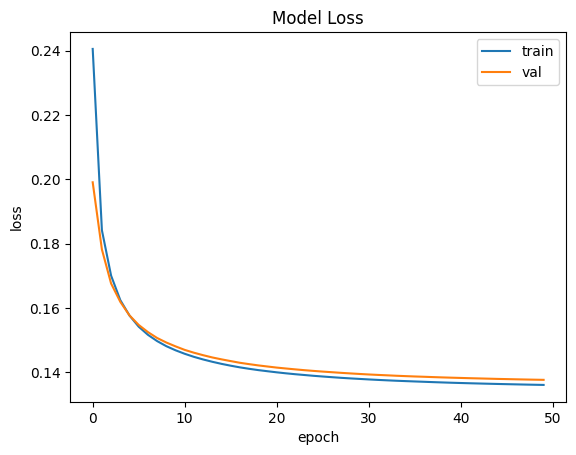

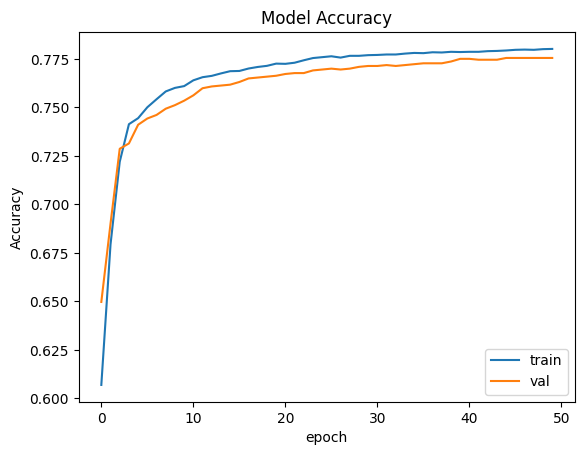

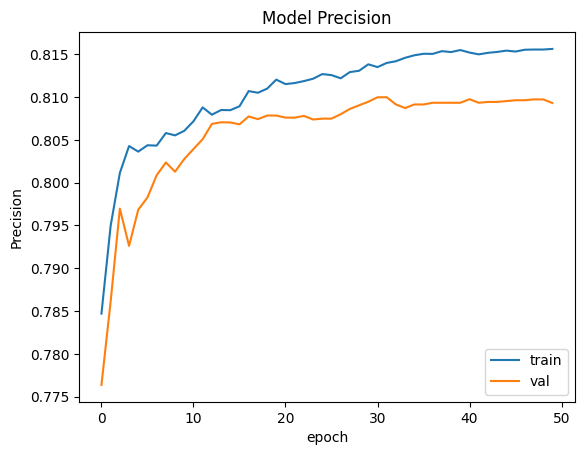

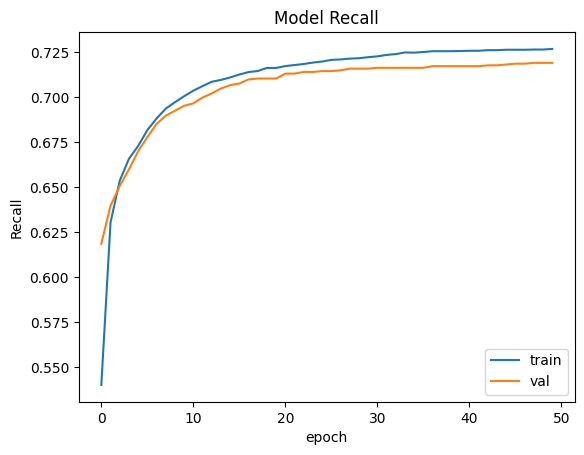

86/86 [==============================] - 0s 1ms/step


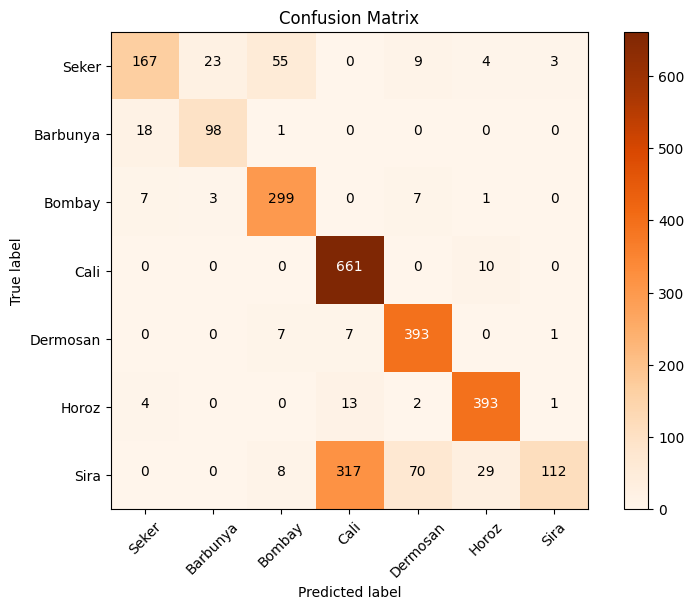

86/86 [==============================] - 0s 3ms/step - loss: 0.1364 - accuracy: 0.7797 - precision: 0.8129 - recall: 0.7147
DNN model classifier evaluation results with StochasticFrankWolfe optimizer and EXP Learning Rate:

Test set Loss = 0.13636
Test set Accuracy = 0.78
Test set Precision = 0.81
Test set Recall = 0.71
Test set F1 Score = 0.76


In [69]:
plot_loss_curve(model_history)
plot_accuracy_curve(model_history)
plot_precision_curve(model_history)
plot_recall_curve(model_history)

plot_confusion_matrix(model, X_test, y_test, classes=class_names, dataset='dry_bean')

model_score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose='auto', steps=test_steps)
print("DNN model classifier evaluation results with StochasticFrankWolfe optimizer and EXP Learning Rate:\n")
print('Test set Loss = {:.5f}'.format(model_score[0]))
print('Test set Accuracy = {:.2f}'.format(model_score[1]))
print('Test set Precision = {:.2f}'.format(model_score[2]))
print('Test set Recall = {:.2f}'.format(model_score[3]))
print('Test set F1 Score = {:.2f}'.format(get_f1_score(precision_metric, recall_metric)))

In [74]:
reset_model_parameters(model)

All model parameters have been reinitilized.


In [75]:
#INV
model.compile(
    optimizer=StochasticFrankWolfe(learning_rate=MyLearningRateSchedule(initial_learning_rate=0.1, method='INV', params={'gamma': 0.001, 'p': 0.9})),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=['accuracy', precision_metric, recall_metric])

In [76]:
model_history = model.fit(X_train, y_train, batch_size=batch_size, epochs=40, shuffle=True,
                          validation_data=(X_val, y_val),
                          steps_per_epoch=train_steps, validation_steps=val_steps, callbacks=[PrintLearningRateCallback()], verbose='auto')

Epoch 1/40
271/273 [============================>.] - ETA: 0s - loss: 0.1611 - accuracy: 0.7967 - precision: 0.8686 - recall: 0.7449
Learning Rate at the end of epoch 1: 0.08053071796894073

273/273 [==============================] - 2s 5ms/step - loss: 0.1611 - accuracy: 0.7969 - precision: 0.8685 - recall: 0.7449 - val_loss: 0.1323 - val_accuracy: 0.8549 - val_precision: 0.8778 - val_recall: 0.8081
Epoch 2/40
269/273 [============================>.] - ETA: 0s - loss: 0.1206 - accuracy: 0.8706 - precision: 0.8933 - recall: 0.8368
Learning Rate at the end of epoch 2: 0.0676027461886406

273/273 [==============================] - 1s 4ms/step - loss: 0.1204 - accuracy: 0.8715 - precision: 0.8941 - recall: 0.8377 - val_loss: 0.1192 - val_accuracy: 0.8751 - val_precision: 0.8958 - val_recall: 0.8444
Epoch 3/40
267/273 [============================>.] - ETA: 0s - loss: 0.1123 - accuracy: 0.8819 - precision: 0.8991 - recall: 0.8552
Learning Rate at the end of epoch 3: 0.05839363485574722

27

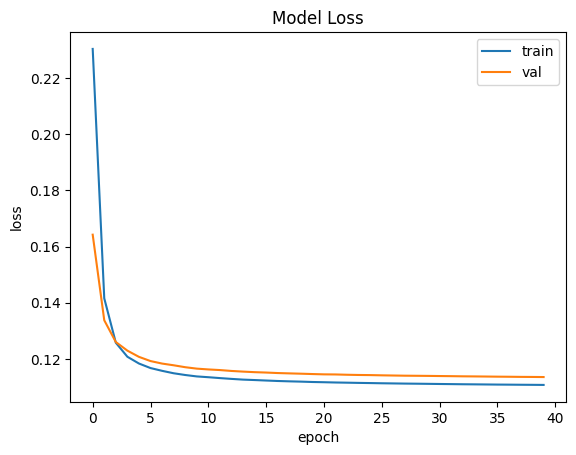

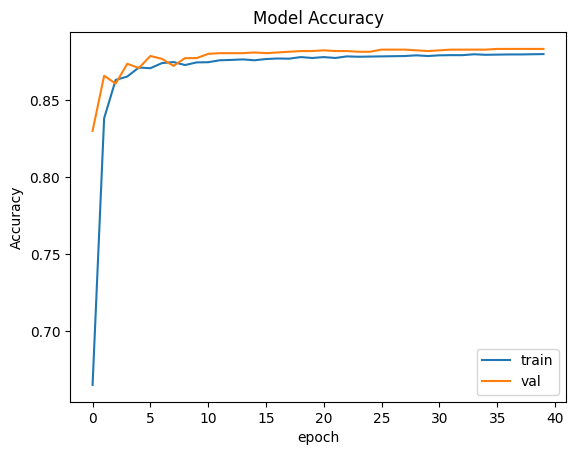

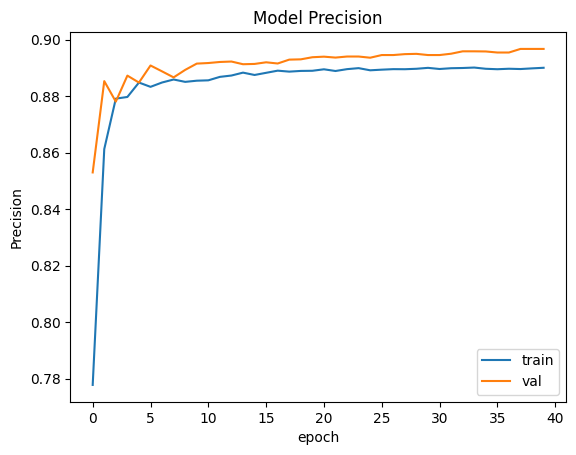

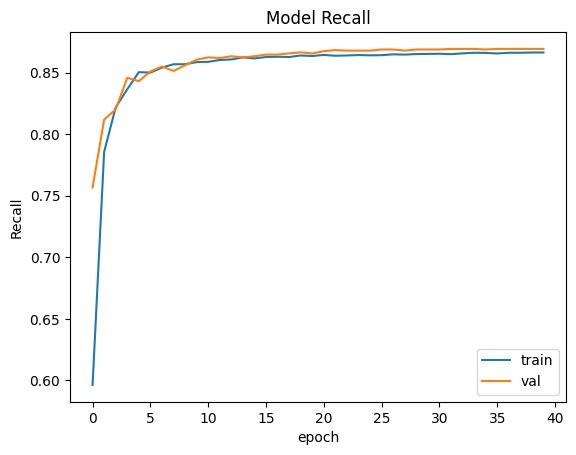

86/86 [==============================] - 0s 1ms/step


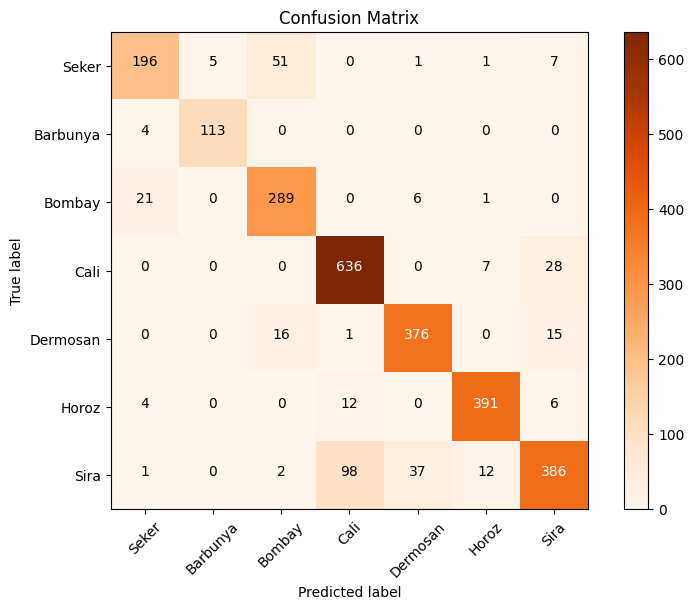

86/86 [==============================] - 0s 3ms/step - loss: 0.1114 - accuracy: 0.8766 - precision: 0.8893 - recall: 0.8615
DNN model classifier evaluation results with StochasticFrankWolfe optimizer and INV Learning Rate:

Test set Loss = 0.11142
Test set Accuracy = 0.88
Test set Precision = 0.89
Test set Recall = 0.86
Test set F1 Score = 0.88


In [73]:
plot_loss_curve(model_history)
plot_accuracy_curve(model_history)
plot_precision_curve(model_history)
plot_recall_curve(model_history)

plot_confusion_matrix(model, X_test, y_test, classes=class_names, dataset='dry_bean')

model_score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose='auto', steps=test_steps)
print("DNN model classifier evaluation results with StochasticFrankWolfe optimizer and INV Learning Rate:\n")
print('Test set Loss = {:.5f}'.format(model_score[0]))
print('Test set Accuracy = {:.2f}'.format(model_score[1]))
print('Test set Precision = {:.2f}'.format(model_score[2]))
print('Test set Recall = {:.2f}'.format(model_score[3]))
print('Test set F1 Score = {:.2f}'.format(get_f1_score(precision_metric, recall_metric)))

In [77]:
reset_model_parameters(model)

All model parameters have been reinitilized.


In [78]:
#STEP
model.compile(
    optimizer=StochasticFrankWolfe(learning_rate=MyLearningRateSchedule(initial_learning_rate=0.5, method='STEP', params={'gamma': 0.99, 'l': 130})),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=['accuracy', precision_metric, recall_metric])

In [79]:
model_history = model.fit(X_train, y_train, batch_size=batch_size, epochs=20, shuffle=True,
                          validation_data=(X_val, y_val),
                          steps_per_epoch=train_steps, validation_steps=val_steps, callbacks=[PrintLearningRateCallback()], verbose='auto')

Epoch 1/20
262/273 [===========================>..] - ETA: 0s - loss: 0.1804 - accuracy: 0.7566 - precision: 0.8662 - recall: 0.6966
Learning Rate at the end of epoch 1: 0.49004998803138733

273/273 [==============================] - 2s 5ms/step - loss: 0.1781 - accuracy: 0.7613 - precision: 0.8675 - recall: 0.7003 - val_loss: 0.1219 - val_accuracy: 0.8958 - val_precision: 0.9120 - val_recall: 0.8517
Epoch 2/20
270/273 [============================>.] - ETA: 0s - loss: 0.1073 - accuracy: 0.8961 - precision: 0.9090 - recall: 0.8808
Learning Rate at the end of epoch 2: 0.4802980124950409

273/273 [==============================] - 1s 4ms/step - loss: 0.1073 - accuracy: 0.8962 - precision: 0.9090 - recall: 0.8807 - val_loss: 0.0983 - val_accuracy: 0.9059 - val_precision: 0.9186 - val_recall: 0.8962
Epoch 3/20
272/273 [============================>.] - ETA: 0s - loss: 0.0934 - accuracy: 0.9073 - precision: 0.9161 - recall: 0.8960
Learning Rate at the end of epoch 3: 0.47074010968208313

27

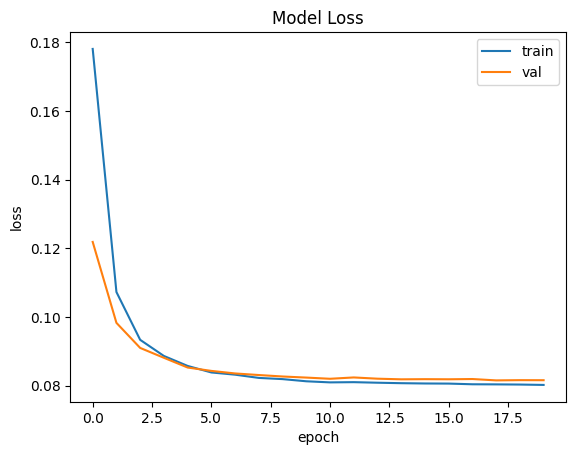

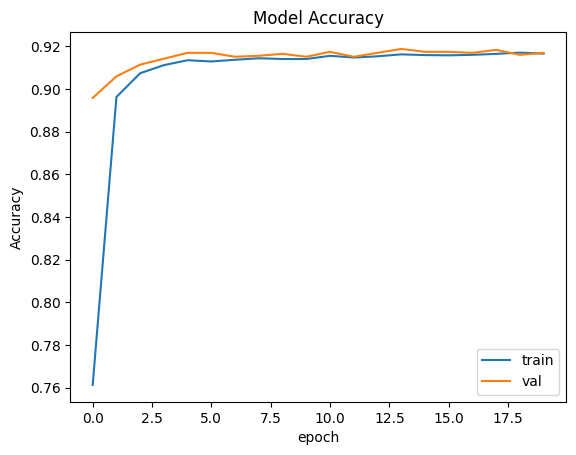

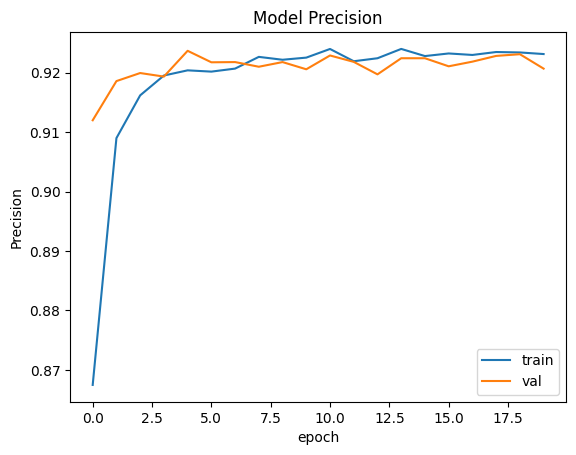

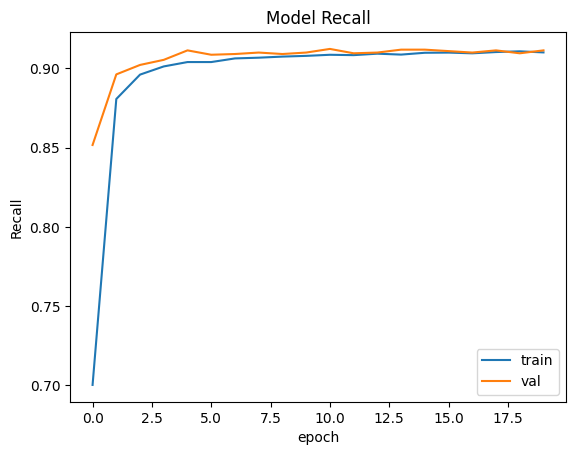

86/86 [==============================] - 0s 1ms/step


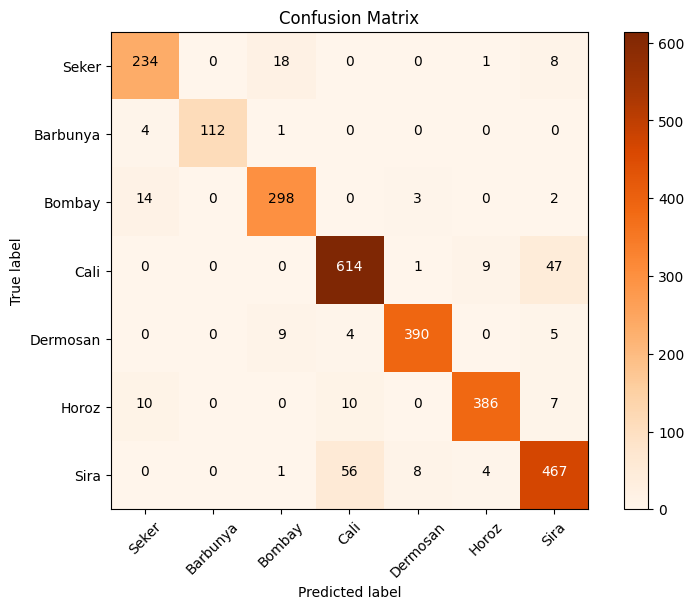

86/86 [==============================] - 0s 3ms/step - loss: 0.0798 - accuracy: 0.9185 - precision: 0.9244 - recall: 0.9119
DNN model classifier evaluation results with StochasticFrankWolfe optimizer and STEP Learning Rate:

Test set Loss = 0.07984
Test set Accuracy = 0.92
Test set Precision = 0.92
Test set Recall = 0.91
Test set F1 Score = 0.92


In [80]:
plot_loss_curve(model_history)
plot_accuracy_curve(model_history)
plot_precision_curve(model_history)
plot_recall_curve(model_history)

plot_confusion_matrix(model, X_test, y_test, classes=class_names, dataset='dry_bean')

model_score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose='auto', steps=test_steps)
print("DNN model classifier evaluation results with StochasticFrankWolfe optimizer and STEP Learning Rate:\n")
print('Test set Loss = {:.5f}'.format(model_score[0]))
print('Test set Accuracy = {:.2f}'.format(model_score[1]))
print('Test set Precision = {:.2f}'.format(model_score[2]))
print('Test set Recall = {:.2f}'.format(model_score[3]))
print('Test set F1 Score = {:.2f}'.format(get_f1_score(precision_metric, recall_metric)))

In [98]:
reset_model_parameters(model)

All model parameters have been reinitilized.


In [99]:
#POLY
model.compile(
    optimizer=StochasticFrankWolfe(learning_rate=MyLearningRateSchedule(initial_learning_rate=0.1, method='POLY', params={'p': 2, 'l': train_steps ** 2})),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=['accuracy', precision_metric, recall_metric])

In [100]:
model_history = model.fit(X_train, y_train, batch_size=batch_size, epochs=20, shuffle=True,
                          validation_data=(X_val, y_val),
                          steps_per_epoch=train_steps, validation_steps=val_steps, callbacks=[PrintLearningRateCallback()], verbose='auto')

Epoch 1/20
270/273 [============================>.] - ETA: 0s - loss: 0.1889 - accuracy: 0.7248 - precision: 0.8353 - recall: 0.6212
Learning Rate at the end of epoch 1: 0.09927140921354294

273/273 [==============================] - 2s 5ms/step - loss: 0.1886 - accuracy: 0.7250 - precision: 0.8350 - recall: 0.6216 - val_loss: 0.1543 - val_accuracy: 0.7810 - val_precision: 0.8166 - val_recall: 0.6951
Epoch 2/20
262/273 [===========================>..] - ETA: 0s - loss: 0.1440 - accuracy: 0.7969 - precision: 0.8353 - recall: 0.7116
Learning Rate at the end of epoch 2: 0.09854283183813095

273/273 [==============================] - 1s 4ms/step - loss: 0.1440 - accuracy: 0.7963 - precision: 0.8352 - recall: 0.7118 - val_loss: 0.1414 - val_accuracy: 0.8021 - val_precision: 0.8330 - val_recall: 0.7167
Epoch 3/20
269/273 [============================>.] - ETA: 0s - loss: 0.1356 - accuracy: 0.8116 - precision: 0.8439 - recall: 0.7354
Learning Rate at the end of epoch 3: 0.09781692922115326

2

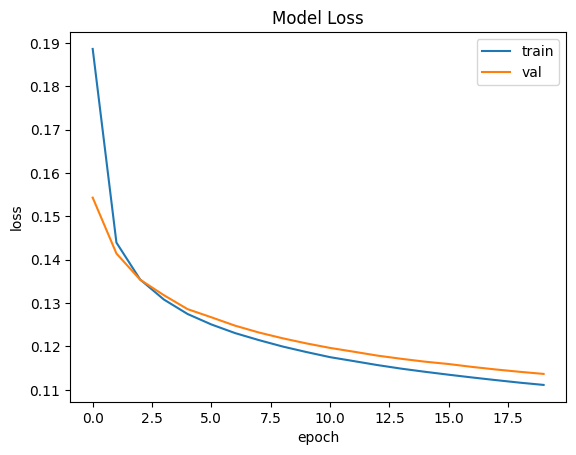

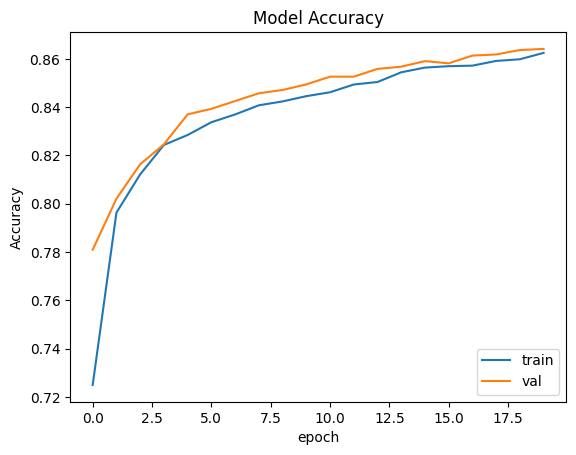

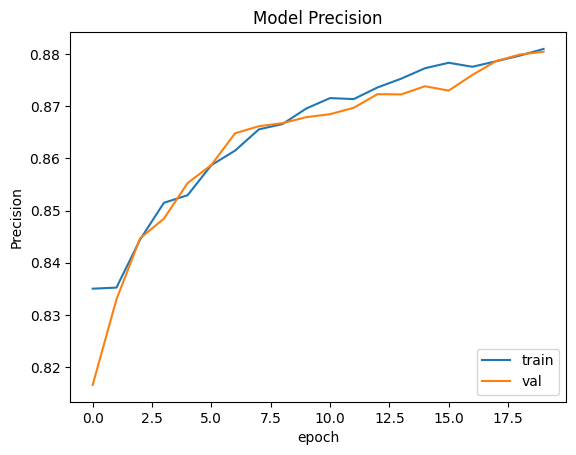

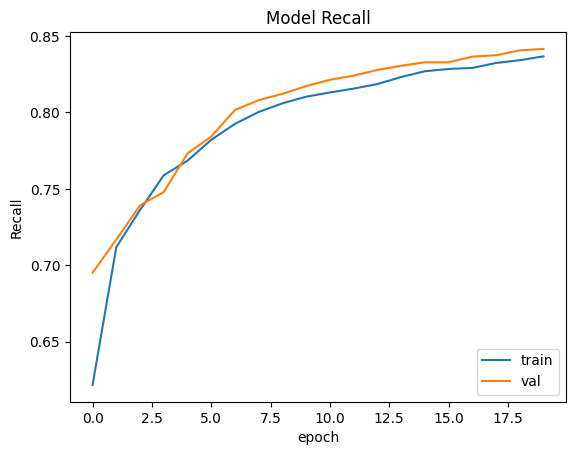

86/86 [==============================] - 0s 1ms/step


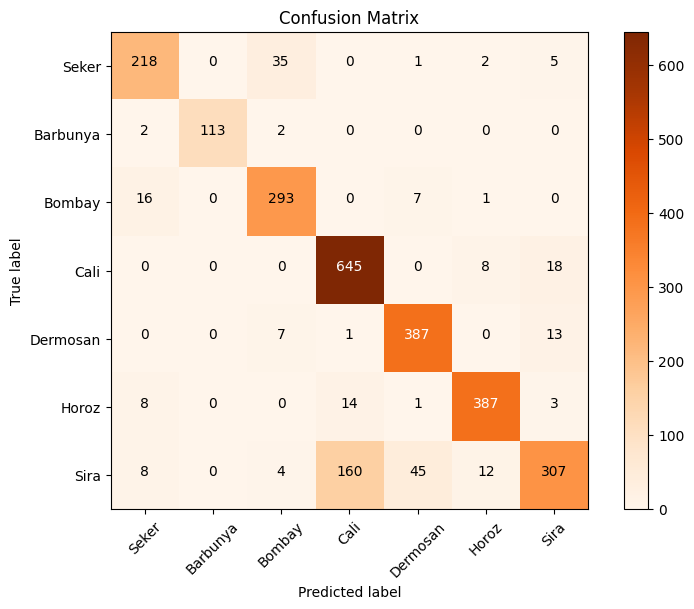

86/86 [==============================] - 0s 2ms/step - loss: 0.1117 - accuracy: 0.8630 - precision: 0.8812 - recall: 0.8447
DNN model classifier evaluation results with StochasticFrankWolfe optimizer and POLY Learning Rate:

Test set Loss = 0.11172
Test set Accuracy = 0.86
Test set Precision = 0.88
Test set Recall = 0.84
Test set F1 Score = 0.86


In [101]:
plot_loss_curve(model_history)
plot_accuracy_curve(model_history)
plot_precision_curve(model_history)
plot_recall_curve(model_history)

plot_confusion_matrix(model, X_test, y_test, classes=class_names, dataset='dry_bean')

model_score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose='auto', steps=test_steps)
print("DNN model classifier evaluation results with StochasticFrankWolfe optimizer and POLY Learning Rate:\n")
print('Test set Loss = {:.5f}'.format(model_score[0]))
print('Test set Accuracy = {:.2f}'.format(model_score[1]))
print('Test set Precision = {:.2f}'.format(model_score[2]))
print('Test set Recall = {:.2f}'.format(model_score[3]))
print('Test set F1 Score = {:.2f}'.format(get_f1_score(precision_metric, recall_metric)))

In [45]:
reset_model_parameters(model)

All model parameters have been reinitilized.


In [46]:
#SINEXP
model.compile(
    optimizer=StochasticFrankWolfe(learning_rate=MyLearningRateSchedule(initial_learning_rate=0.1, method='SINEXP', params={'k1':0.05, 'l':500,'gamma':0.999})),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=['accuracy', precision_metric, recall_metric])

In [47]:
model_history = model.fit(X_train, y_train, batch_size=batch_size, epochs=30, shuffle=True,
                          validation_data=(X_val, y_val),
                          steps_per_epoch=train_steps, validation_steps=val_steps, callbacks=[PrintLearningRateCallback()], verbose='auto')

Epoch 1/30
267/273 [============================>.] - ETA: 0s - loss: 0.2161 - accuracy: 0.6901 - precision: 0.7953 - recall: 0.5237
Learning Rate at the end of epoch 1: 0.047447651624679565

273/273 [==============================] - 2s 5ms/step - loss: 0.2154 - accuracy: 0.6910 - precision: 0.7969 - recall: 0.5253 - val_loss: 0.1864 - val_accuracy: 0.7401 - val_precision: 0.8493 - val_recall: 0.6290
Epoch 2/30
266/273 [============================>.] - ETA: 0s - loss: 0.1764 - accuracy: 0.7565 - precision: 0.8551 - recall: 0.6517
Learning Rate at the end of epoch 2: 0.029273545369505882

273/273 [==============================] - 1s 4ms/step - loss: 0.1764 - accuracy: 0.7566 - precision: 0.8550 - recall: 0.6524 - val_loss: 0.1776 - val_accuracy: 0.7484 - val_precision: 0.8482 - val_recall: 0.6566
Epoch 3/30
273/273 [==============================] - ETA: 0s - loss: 0.1708 - accuracy: 0.7634 - precision: 0.8551 - recall: 0.6699
Learning Rate at the end of epoch 3: 0.03217830881476402


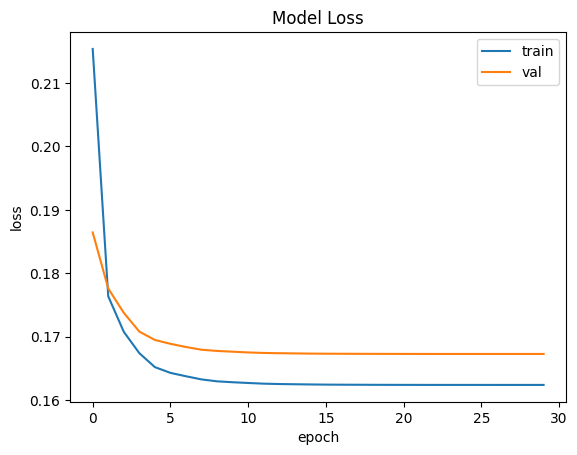

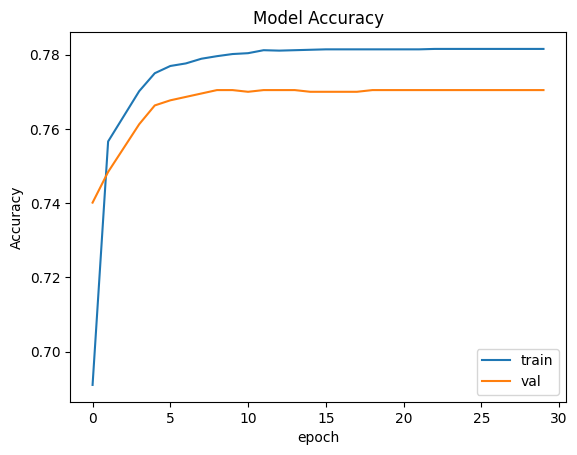

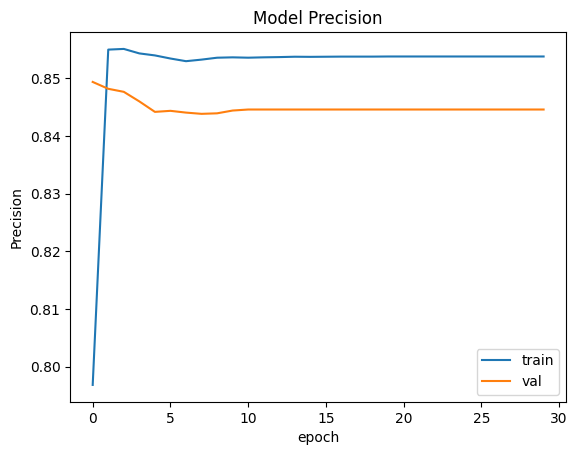

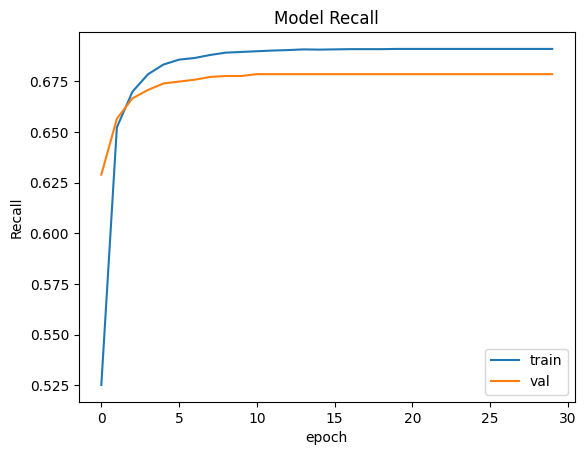

86/86 [==============================] - 0s 1ms/step


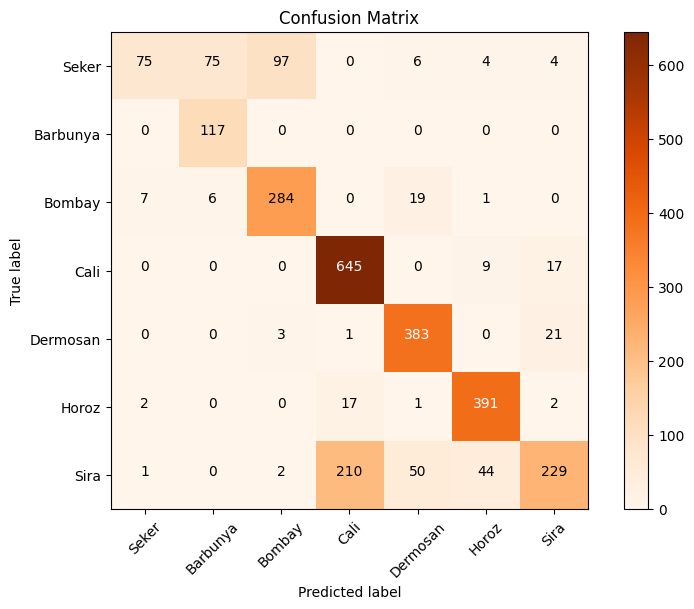

86/86 [==============================] - 0s 3ms/step - loss: 0.1639 - accuracy: 0.7800 - precision: 0.8503 - recall: 0.6820
DNN model classifier evaluation results with StochasticFrankWolfe optimizer and SINEXP Learning Rate:

Test set Loss = 0.16387
Test set Accuracy = 0.78
Test set Precision = 0.85
Test set Recall = 0.68
Test set F1 Score = 0.76


In [49]:
plot_loss_curve(model_history)
plot_accuracy_curve(model_history)
plot_precision_curve(model_history)
plot_recall_curve(model_history)

plot_confusion_matrix(model, X_test, y_test, classes=class_names, dataset='dry_bean')

model_score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose='auto', steps=test_steps)
print("DNN model classifier evaluation results with StochasticFrankWolfe optimizer and SINEXP Learning Rate:\n")
print('Test set Loss = {:.5f}'.format(model_score[0]))
print('Test set Accuracy = {:.2f}'.format(model_score[1]))
print('Test set Precision = {:.2f}'.format(model_score[2]))
print('Test set Recall = {:.2f}'.format(model_score[3]))
print('Test set F1 Score = {:.2f}'.format(get_f1_score(precision_metric, recall_metric)))

In [50]:
reset_model_parameters(model)

All model parameters have been reinitilized.


# DenseNet121 on CIFAR-10 Dataset with SGD and SFW

# CIFAR-10 Dataset Description

## Dataset Overview
- **Number of Instances:** 60,000 (50,000 for training, 10,000 for testing)
- **Number of Classes:** 10
- **Data Type:** Multivariate
- **Subject Area:** Computer Vision
- **Associated Tasks:** Image Classification
- **Image Dimensions:** 32x32 pixels with 3 color channels (RGB)

## Dataset Information
The CIFAR-10 dataset is a collection of 60,000 32x32 color images in 10 different classes, with 6,000 images per class. The dataset is split into a training set of 50,000 images and a test set of 10,000 images. Each class represents a distinct object or animal category.

## Classes
1. **Airplane**
2. **Automobile**
3. **Bird**
4. **Cat**
5. **Deer**
6. **Dog**
7. **Frog**
8. **Horse**
9. **Ship**
10. **Truck**

## Image Features
- Each image is 32x32 pixels, and it has three color channels (RGB).
- Total Features: \(32 \times 32 \times 3 = 3072\) features per image.

## Target Variable
- **Class Label:** Categorical variable indicating the class of the object or animal in the image.

## Dataset Purpose
CIFAR-10 is widely used in the field of computer vision for benchmarking image classification algorithms. The relatively small size of the images and the variety of classes make it a suitable dataset for testing and comparing the performance of different models.

## Units and Missing Values
- Pixel values in the RGB channels represent color intensity (0 to 255).
- No missing values are reported as images are complete and standardized.

## Additional Notes
- CIFAR-10 serves as a standard benchmark in machine learning research and is often used for educational purposes due to its manageable size.



In [14]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
split = 40000
X_val, y_val = X_train[split:], y_train[split:]
X_train, y_train = X_train[:split], y_train[:split]

170498071/170498071 [==============================] - 3s 0us/step


In [15]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [16]:
batch_size = 128

train_steps = int(np.ceil(X_train.shape[0] / batch_size))
test_steps = int(np.ceil(X_test.shape[0] / batch_size))
val_steps = int(np.ceil(X_val.shape[0] / batch_size))

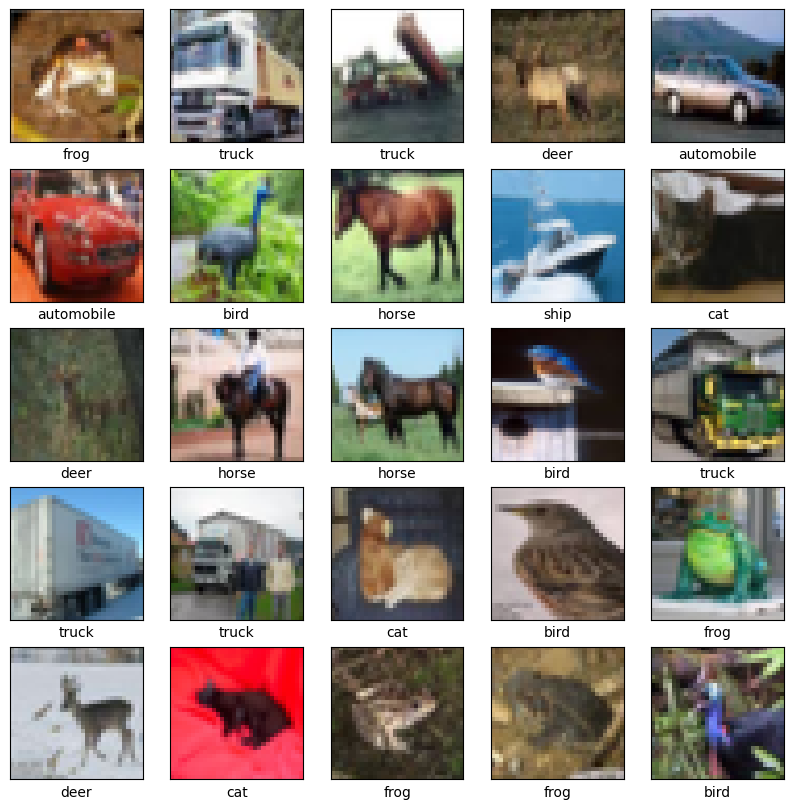

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [18]:
X_train = tf.keras.applications.densenet.preprocess_input(X_train)
X_val = tf.keras.applications.densenet.preprocess_input(X_val)
X_test = tf.keras.applications.densenet.preprocess_input(X_test)

In [19]:
y_train = one_hot_label_encoder(y_train)
y_val = one_hot_label_encoder(y_val)
y_test = one_hot_label_encoder(y_test)

In [51]:
densenet_model = tf.keras.applications.densenet.DenseNet121(include_top=True, weights=None, input_shape=X_train.shape[1:], 
                                                            pooling='avg', classes=len(class_names), classifier_activation='softmax')

In [52]:
#densenet_model.summary()

In [53]:
densenet_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy', precision_metric, recall_metric])

In [54]:
densenet_model_history = densenet_model.fit(X_train, y_train, batch_size=batch_size, epochs=25, shuffle=True,
                          validation_data=(X_val, y_val),
                          steps_per_epoch=train_steps, validation_steps=val_steps, callbacks=[es], verbose='auto')

Epoch 1/25
313/313 [==============================] - 70s 77ms/step - loss: 2.2063 - accuracy: 0.2134 - precision: 0.6319 - recall: 0.0755 - val_loss: 2.0896 - val_accuracy: 0.2319 - val_precision: 0.5849 - val_recall: 0.0031
Epoch 2/25
313/313 [==============================] - 21s 68ms/step - loss: 1.8994 - accuracy: 0.3141 - precision: 0.5328 - recall: 0.0623 - val_loss: 1.8601 - val_accuracy: 0.3266 - val_precision: 0.5518 - val_recall: 0.0719
Epoch 3/25
313/313 [==============================] - 21s 68ms/step - loss: 1.7578 - accuracy: 0.3584 - precision: 0.5870 - recall: 0.1015 - val_loss: 1.7470 - val_accuracy: 0.3632 - val_precision: 0.5706 - val_recall: 0.1143
Epoch 4/25
313/313 [==============================] - 21s 68ms/step - loss: 1.6639 - accuracy: 0.3914 - precision: 0.6192 - recall: 0.1366 - val_loss: 1.6771 - val_accuracy: 0.3833 - val_precision: 0.6008 - val_recall: 0.1308
Epoch 5/25
313/313 [==============================] - 21s 68ms/step - loss: 1.5922 - accuracy: 0

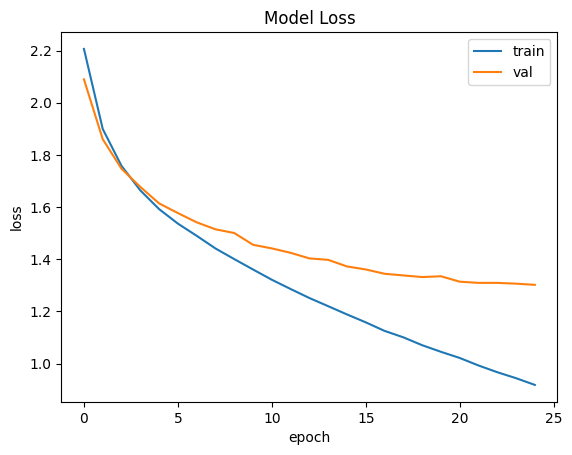

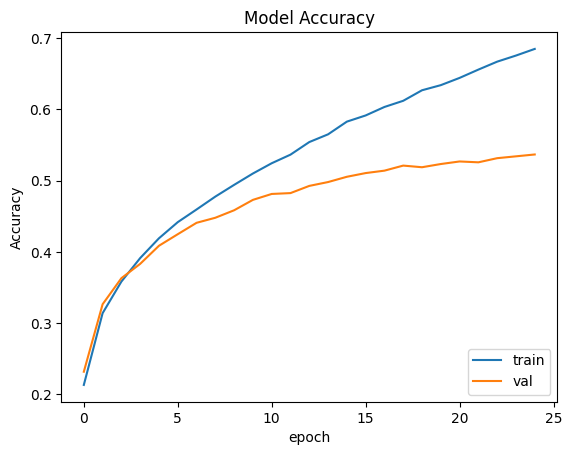

79/79 [==============================] - 3s 15ms/step


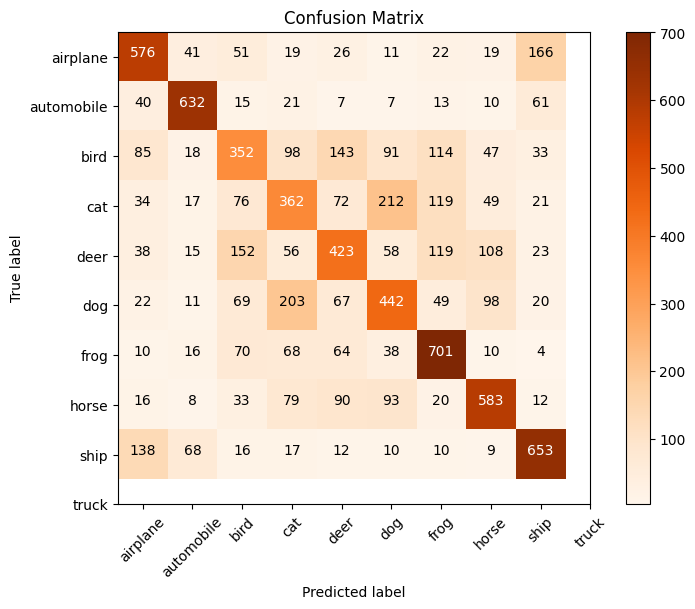

79/79 [==============================] - 1s 17ms/step - loss: 1.3054 - accuracy: 0.5336 - precision: 0.6694 - recall: 0.4035
DenseNet model classifier evaluation results with SGD optimizer:

Test set Loss = 1.30539
Test set Accuracy = 0.53
Test set Precision = 0.67
Test set Recall = 0.40
Test set F1 Score = 0.50


In [55]:
plot_loss_curve(densenet_model_history)
plot_accuracy_curve(densenet_model_history)
plot_precision_curve(densenet_model_history)
plot_recall_curve(densenet_model_history)

plot_confusion_matrix(densenet_model, X_test, y_test, classes=class_names, dataset='cifar10')

densenet_model_score = densenet_model.evaluate(X_test, y_test, batch_size=batch_size, verbose='auto', steps=test_steps)
print("DenseNet model classifier evaluation results with SGD optimizer:\n")
print('Test set Loss = {:.5f}'.format(densenet_model_score[0]))
print('Test set Accuracy = {:.2f}'.format(densenet_model_score[1]))
print('Test set Precision = {:.2f}'.format(densenet_model_score[2]))
print('Test set Recall = {:.2f}'.format(densenet_model_score[3]))
print('Test set F1 Score = {:.2f}'.format(get_f1_score(precision_metric, recall_metric)))

In [30]:
#FIX
densenet_model = tf.keras.applications.densenet.DenseNet121(include_top=True, weights=None, input_shape=X_train.shape[1:], 
                                                            pooling='avg', classes=len(class_names), classifier_activation='softmax')

In [31]:
densenet_model.compile(
    optimizer=StochasticFrankWolfe(learning_rate=MyLearningRateSchedule(initial_learning_rate=0.1, method='FIX', params={})),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy', precision_metric, recall_metric])

In [32]:
densenet_model_history = densenet_model.fit(X_train, y_train, batch_size=batch_size, epochs=25, shuffle=True,
                          validation_data=(X_val, y_val),
                          steps_per_epoch=train_steps, validation_steps=val_steps, callbacks=[es, PrintLearningRateCallback()], verbose='auto')

Epoch 1/25
313/313 [==============================] - ETA: 0s - loss: 1.9723 - accuracy: 0.3552 - precision: 0.6646 - recall: 0.1972
Learning Rate at the end of epoch 1: 0.20000000298023224

313/313 [==============================] - 67s 77ms/step - loss: 1.9723 - accuracy: 0.3552 - precision: 0.6646 - recall: 0.1972 - val_loss: 2.2813 - val_accuracy: 0.1314 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/25
313/313 [==============================] - ETA: 0s - loss: 1.4004 - accuracy: 0.4837 - precision: 0.6839 - recall: 0.2670
Learning Rate at the end of epoch 2: 0.20000000298023224

313/313 [==============================] - 21s 68ms/step - loss: 1.4004 - accuracy: 0.4837 - precision: 0.6839 - recall: 0.2670 - val_loss: 1.7848 - val_accuracy: 0.3563 - val_precision: 0.6440 - val_recall: 0.0284
Epoch 3/25
313/313 [==============================] - ETA: 0s - loss: 1.2898 - accuracy: 0.5265 - precision: 0.7178 - recall: 0.3352
Learning Rate at the end of epoch 3: 0.20000000

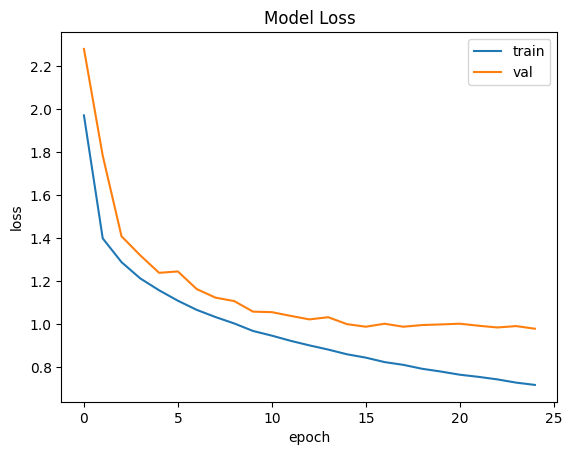

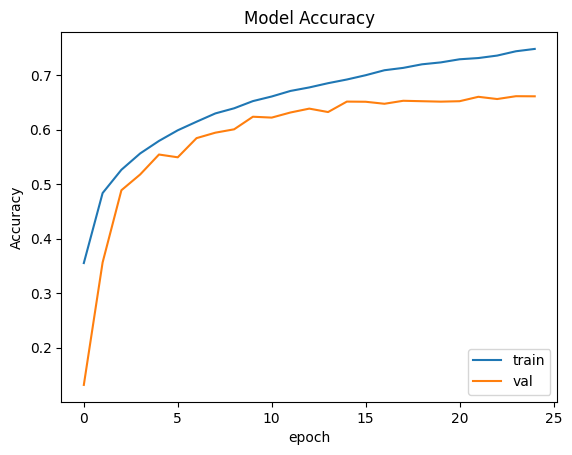

79/79 [==============================] - 3s 14ms/step


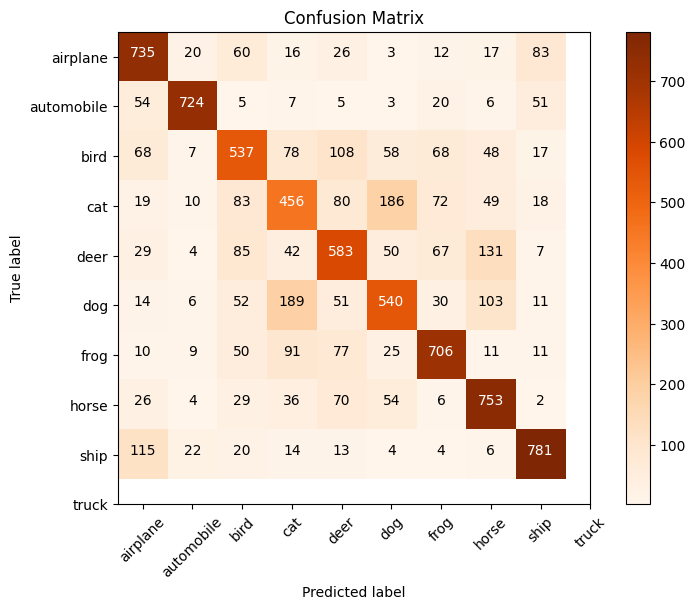

79/79 [==============================] - 1s 16ms/step - loss: 1.0046 - accuracy: 0.6567 - precision: 0.7406 - recall: 0.5738
DenseNet model classifier evaluation results with StochasticFrankWolfe optimizer and FIX Learning Rate:

Test set Loss = 1.00455
Test set Accuracy = 0.66
Test set Precision = 0.74
Test set Recall = 0.57
Test set F1 Score = 0.65


In [33]:
plot_loss_curve(densenet_model_history)
plot_accuracy_curve(densenet_model_history)
plot_precision_curve(densenet_model_history)
plot_recall_curve(densenet_model_history)

plot_confusion_matrix(densenet_model, X_test, y_test, classes=class_names, dataset='cifar10')

densenet_model_score = densenet_model.evaluate(X_test, y_test, batch_size=batch_size, verbose='auto', steps=test_steps)
print("DenseNet model classifier evaluation results with StochasticFrankWolfe optimizer and FIX Learning Rate:\n")
print('Test set Loss = {:.5f}'.format(densenet_model_score[0]))
print('Test set Accuracy = {:.2f}'.format(densenet_model_score[1]))
print('Test set Precision = {:.2f}'.format(densenet_model_score[2]))
print('Test set Recall = {:.2f}'.format(densenet_model_score[3]))
print('Test set F1 Score = {:.2f}'.format(get_f1_score(precision_metric, recall_metric)))

In [39]:
#EXP
densenet_model = tf.keras.applications.densenet.DenseNet121(include_top=True, weights=None, input_shape=X_train.shape[1:], 
                                                            pooling='avg', classes=len(class_names), classifier_activation='softmax')

In [40]:
densenet_model.compile(
    optimizer=StochasticFrankWolfe(learning_rate=MyLearningRateSchedule(initial_learning_rate=0.1, method='EXP', params={'gamma': 0.9999})),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy', precision_metric, recall_metric])

In [41]:
densenet_model_history = densenet_model.fit(X_train, y_train, batch_size=batch_size, epochs=25, shuffle=True,
                          validation_data=(X_val, y_val),
                          steps_per_epoch=train_steps, validation_steps=val_steps, callbacks=[es, PrintLearningRateCallback()], verbose='auto')

Epoch 1/25
313/313 [==============================] - ETA: 0s - loss: 2.0360 - accuracy: 0.3311 - precision: 0.2802 - recall: 0.0925
Learning Rate at the end of epoch 1: 0.09692751616239548

313/313 [==============================] - 68s 81ms/step - loss: 2.0360 - accuracy: 0.3311 - precision: 0.2802 - recall: 0.0925 - val_loss: 1.7957 - val_accuracy: 0.3583 - val_precision: 0.7222 - val_recall: 0.0013
Epoch 2/25
313/313 [==============================] - ETA: 0s - loss: 1.4836 - accuracy: 0.4467 - precision: 0.6557 - recall: 0.2249
Learning Rate at the end of epoch 2: 0.09394003450870514

313/313 [==============================] - 22s 71ms/step - loss: 1.4836 - accuracy: 0.4467 - precision: 0.6557 - recall: 0.2249 - val_loss: 1.5414 - val_accuracy: 0.4364 - val_precision: 0.7386 - val_recall: 0.1099
Epoch 3/25
313/313 [==============================] - ETA: 0s - loss: 1.3742 - accuracy: 0.4891 - precision: 0.6801 - recall: 0.2862
Learning Rate at the end of epoch 3: 0.0910446420311927

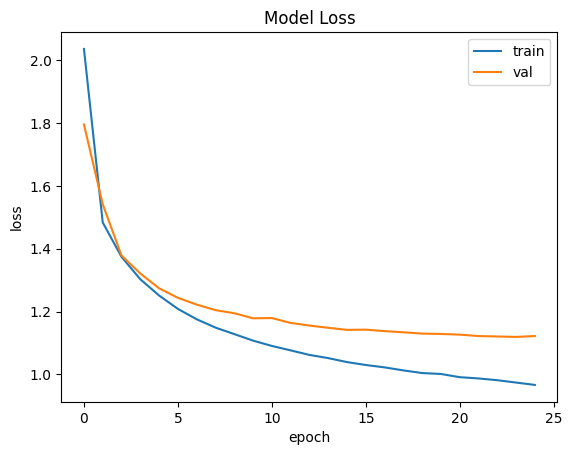

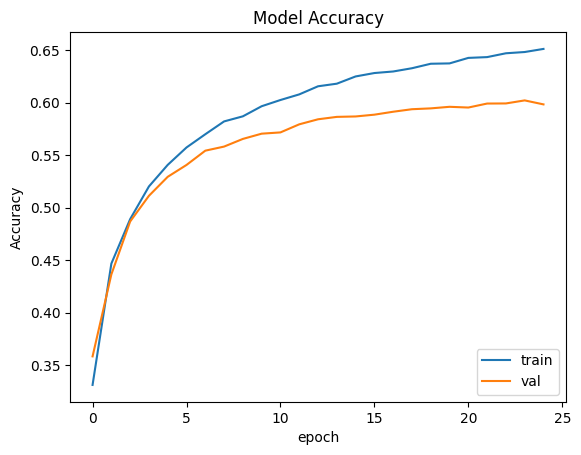

79/79 [==============================] - 4s 15ms/step


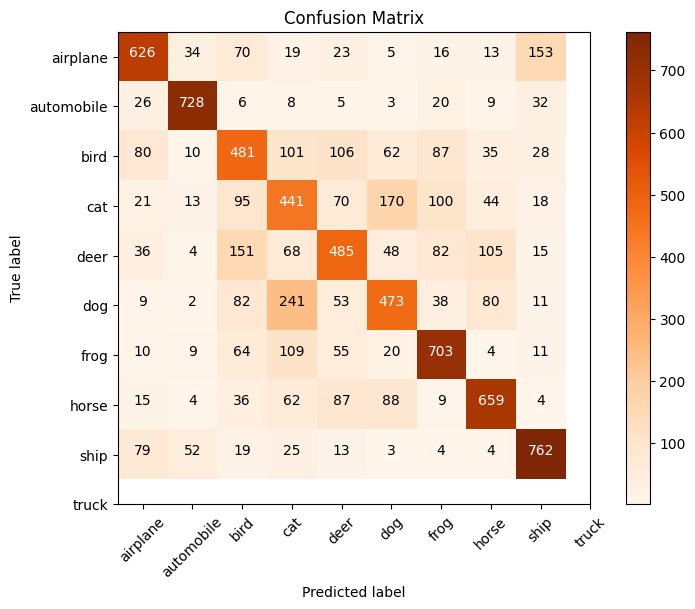

79/79 [==============================] - 1s 18ms/step - loss: 1.1189 - accuracy: 0.6018 - precision: 0.7170 - recall: 0.4850
DenseNet model classifier evaluation results with StochasticFrankWolfe optimizer and EXP Learning Rate:

Test set Loss = 1.11888
Test set Accuracy = 0.60
Test set Precision = 0.72
Test set Recall = 0.49
Test set F1 Score = 0.58


In [42]:
plot_loss_curve(densenet_model_history)
plot_accuracy_curve(densenet_model_history)
plot_precision_curve(densenet_model_history)
plot_recall_curve(densenet_model_history)

plot_confusion_matrix(densenet_model, X_test, y_test, classes=class_names, dataset='cifar10')

densenet_model_score = densenet_model.evaluate(X_test, y_test, batch_size=batch_size, verbose='auto', steps=test_steps)
print("DenseNet model classifier evaluation results with StochasticFrankWolfe optimizer and EXP Learning Rate:\n")
print('Test set Loss = {:.5f}'.format(densenet_model_score[0]))
print('Test set Accuracy = {:.2f}'.format(densenet_model_score[1]))
print('Test set Precision = {:.2f}'.format(densenet_model_score[2]))
print('Test set Recall = {:.2f}'.format(densenet_model_score[3]))
print('Test set F1 Score = {:.2f}'.format(get_f1_score(precision_metric, recall_metric)))

In [20]:
#INV
densenet_model = tf.keras.applications.densenet.DenseNet121(include_top=True, weights=None, input_shape=X_train.shape[1:], 
                                                            pooling='avg', classes=len(class_names), classifier_activation='softmax')

In [21]:
densenet_model.compile(
    optimizer=StochasticFrankWolfe(learning_rate=MyLearningRateSchedule(initial_learning_rate=0.3, method='INV', params={'gamma': 0.0001, 'p': 0.9})),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy', precision_metric, recall_metric])

In [22]:
densenet_model_history = densenet_model.fit(X_train, y_train, batch_size=batch_size, epochs=40, shuffle=True,
                          validation_data=(X_val, y_val),
                          steps_per_epoch=train_steps, validation_steps=val_steps, callbacks=[es, PrintLearningRateCallback()], verbose='auto')

Epoch 1/40


I0000 00:00:1706624869.065493     112 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


313/313 [==============================] - ETA: 0s - loss: 2.1332 - accuracy: 0.3275 - precision: 0.5530 - recall: 0.0817
Learning Rate at the end of epoch 1: 0.29181838035583496

313/313 [==============================] - 102s 113ms/step - loss: 2.1332 - accuracy: 0.3275 - precision: 0.5530 - recall: 0.0817 - val_loss: 2.1954 - val_accuracy: 0.1986 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/40
313/313 [==============================] - ETA: 0s - loss: 1.4148 - accuracy: 0.4735 - precision: 0.6765 - recall: 0.2488
Learning Rate at the end of epoch 2: 0.2840699255466461

313/313 [==============================] - 26s 83ms/step - loss: 1.4148 - accuracy: 0.4735 - precision: 0.6765 - recall: 0.2488 - val_loss: 2.0472 - val_accuracy: 0.2222 - val_precision: 0.5333 - val_recall: 0.0048
Epoch 3/40
313/313 [==============================] - ETA: 0s - loss: 1.2742 - accuracy: 0.5335 - precision: 0.7166 - recall: 0.3392
Learning Rate at the end of epoch 3: 0.2767433524131775



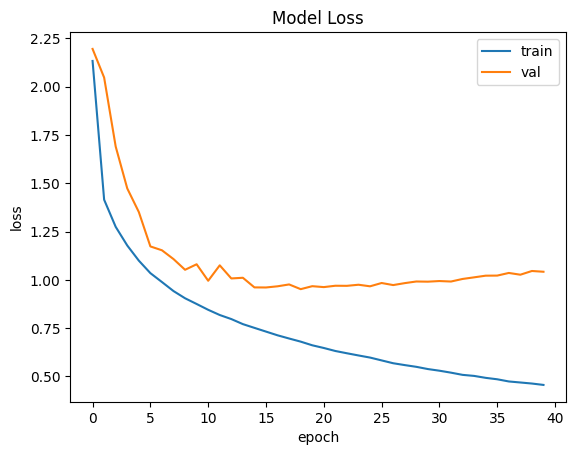

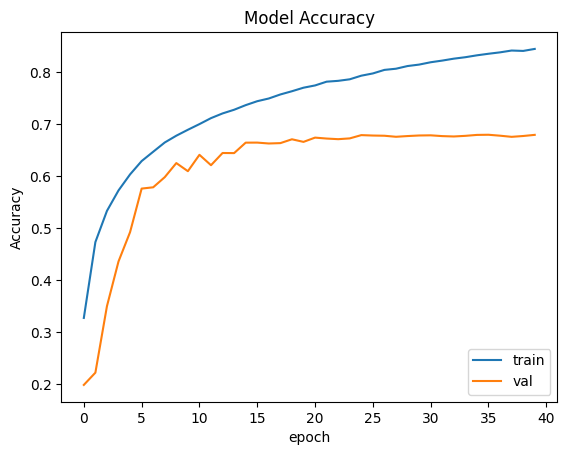

79/79 [==============================] - 8s 45ms/step


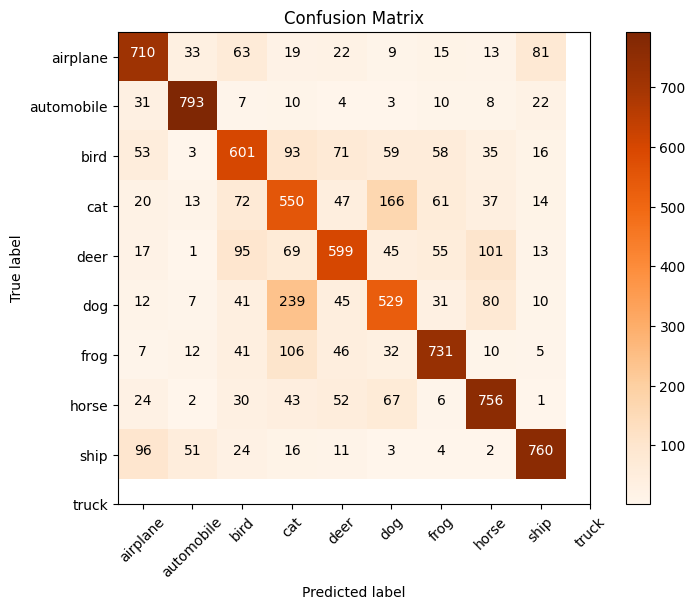

79/79 [==============================] - 2s 20ms/step - loss: 1.0261 - accuracy: 0.6800 - precision: 0.7311 - recall: 0.6408
DenseNet model classifier evaluation results with StochasticFrankWolfe optimizer and INV Learning Rate:

Test set Loss = 1.02611
Test set Accuracy = 0.68
Test set Precision = 0.73
Test set Recall = 0.64
Test set F1 Score = 0.68


In [23]:
plot_loss_curve(densenet_model_history)
plot_accuracy_curve(densenet_model_history)
plot_precision_curve(densenet_model_history)
plot_recall_curve(densenet_model_history)

plot_confusion_matrix(densenet_model, X_test, y_test, classes=class_names, dataset='cifar10')

densenet_model_score = densenet_model.evaluate(X_test, y_test, batch_size=batch_size, verbose='auto', steps=test_steps)
print("DenseNet model classifier evaluation results with StochasticFrankWolfe optimizer and INV Learning Rate:\n")
print('Test set Loss = {:.5f}'.format(densenet_model_score[0]))
print('Test set Accuracy = {:.2f}'.format(densenet_model_score[1]))
print('Test set Precision = {:.2f}'.format(densenet_model_score[2]))
print('Test set Recall = {:.2f}'.format(densenet_model_score[3]))
print('Test set F1 Score = {:.2f}'.format(get_f1_score(precision_metric, recall_metric)))

In [55]:
#POLY
densenet_model = tf.keras.applications.densenet.DenseNet121(include_top=True, weights=None, input_shape=X_train.shape[1:], 
                                                            pooling='avg', classes=len(class_names), classifier_activation='softmax')

In [56]:
Num_Epochs = 25

densenet_model.compile(
    optimizer=StochasticFrankWolfe(learning_rate=MyLearningRateSchedule(initial_learning_rate=0.25, method='POLY', params={'p': 0.9, 'l': train_steps * Num_Epochs})),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy', precision_metric, recall_metric])

In [ ]:
densenet_model_history = densenet_model.fit(X_train, y_train, batch_size=batch_size, epochs=Num_Epochs, shuffle=True,
                          validation_data=(X_val, y_val),
                          steps_per_epoch=train_steps, validation_steps=val_steps, callbacks=[es, PrintLearningRateCallback()], verbose='auto')

Epoch 1/25
313/313 [==============================] - ETA: 0s - loss: 1.9331 - accuracy: 0.3787 - precision: 0.7114 - recall: 0.2652
Learning Rate at the end of epoch 1: 0.24101059138774872

313/313 [==============================] - 88s 100ms/step - loss: 1.9331 - accuracy: 0.3787 - precision: 0.7114 - recall: 0.2652 - val_loss: 2.0980 - val_accuracy: 0.2146 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/25
313/313 [==============================] - ETA: 0s - loss: 1.2982 - accuracy: 0.5235 - precision: 0.7107 - recall: 0.3250
Learning Rate at the end of epoch 2: 0.23195479810237885

313/313 [==============================] - 29s 91ms/step - loss: 1.2982 - accuracy: 0.5235 - precision: 0.7107 - recall: 0.3250 - val_loss: 1.6396 - val_accuracy: 0.3612 - val_precision: 0.5692 - val_recall: 0.1185
Epoch 3/25
313/313 [==============================] - ETA: 0s - loss: 1.1536 - accuracy: 0.5829 - precision: 0.7451 - recall: 0.4130
Learning Rate at the end of epoch 3: 0.2228595

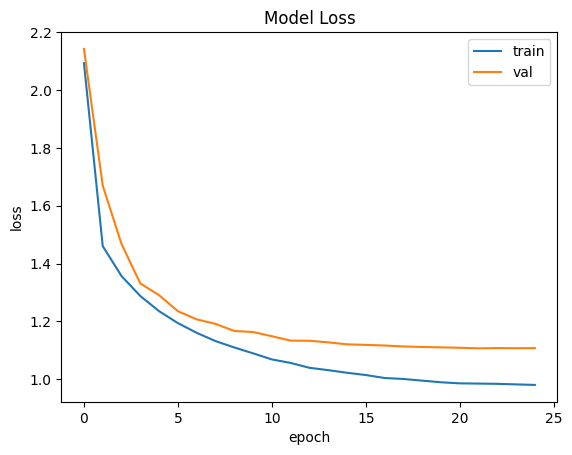

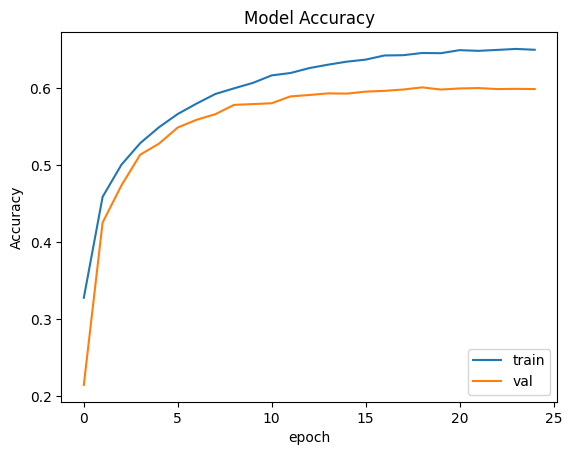

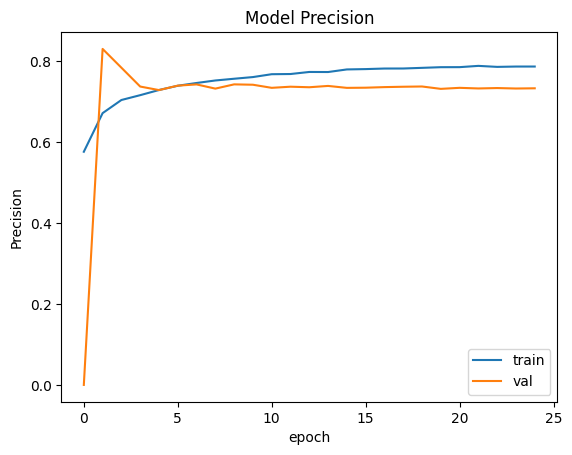

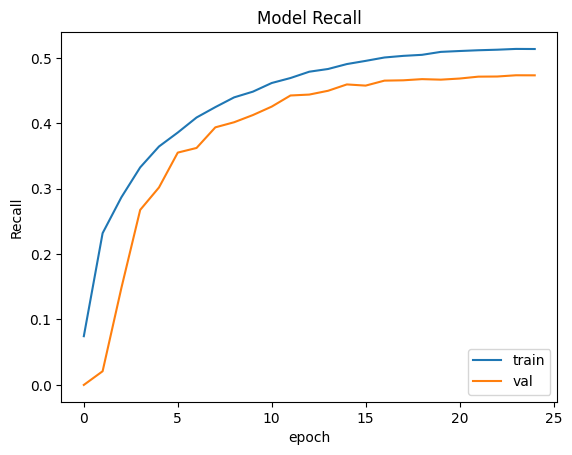

79/79 [==============================] - 4s 18ms/step


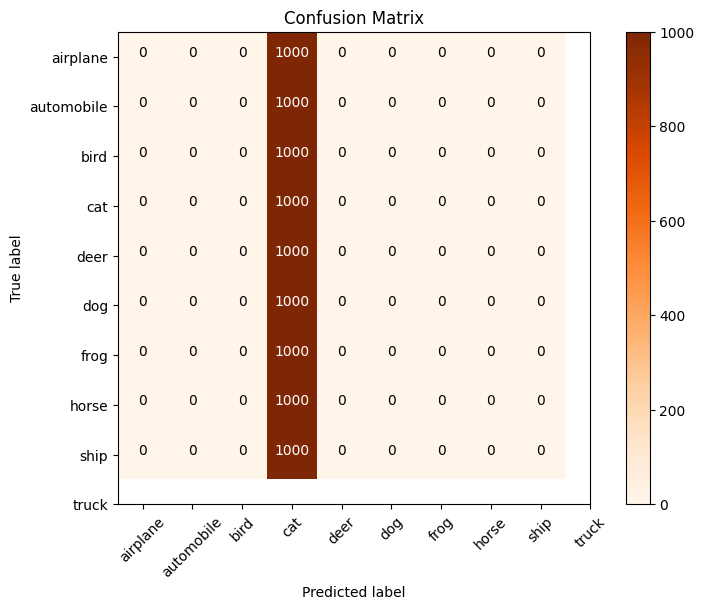

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [52]:
plot_loss_curve(densenet_model_history)
plot_accuracy_curve(densenet_model_history)
plot_precision_curve(densenet_model_history)
plot_recall_curve(densenet_model_history)

plot_confusion_matrix(densenet_model, X_test, y_test, classes=class_names, dataset='cifar10')

densenet_model_score = densenet_model.evaluate(X_test, y_test, batch_size=batch_size, verbose='auto', steps=test_steps)
print("DenseNet model classifier evaluation results with StochasticFrankWolfe optimizer and POLY Learning Rate:\n")
print('Test set Loss = {:.5f}'.format(densenet_model_score[0]))
print('Test set Accuracy = {:.2f}'.format(densenet_model_score[1]))
print('Test set Precision = {:.2f}'.format(densenet_model_score[2]))
print('Test set Recall = {:.2f}'.format(densenet_model_score[3]))
print('Test set F1 Score = {:.2f}'.format(get_f1_score(precision_metric, recall_metric)))

In [ ]:
#TRI
densenet_model = tf.keras.applications.densenet.DenseNet121(include_top=True, weights=None, input_shape=X_train.shape[1:], 
                                                            pooling='avg', classes=len(class_names), classifier_activation='softmax')

In [ ]:
# densenet_model.compile(
#     optimizer=StochasticFrankWolfe(learning_rate=MyLearningRateSchedule(initial_learning_rate=0.1, method='TRI', params={'gamma': 0.001, 'p': 0.9})),
#     loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
#     metrics=['accuracy', precision_metric, recall_metric])

In [ ]:
densenet_model_history = densenet_model.fit(X_train, y_train, batch_size=batch_size, epochs=20, shuffle=True,
                          validation_data=(X_val, y_val),
                          steps_per_epoch=train_steps, validation_steps=val_steps, callbacks=[es], verbose='auto')

In [ ]:
plot_loss_curve(densenet_model_history)
plot_accuracy_curve(densenet_model_history)
plot_precision_curve(densenet_model_history)
plot_recall_curve(densenet_model_history)

plot_confusion_matrix(densenet_model, X_test, y_test, classes=class_names, dataset='cifar10')

densenet_model_score = densenet_model.evaluate(X_test, y_test, batch_size=batch_size, verbose='auto', steps=test_steps)
print("DenseNet model classifier evaluation results with StochasticFrankWolfe optimizer and TRI Learning Rate:\n")
print('Test set Loss = {:.5f}'.format(densenet_model_score[0]))
print('Test set Accuracy = {:.2f}'.format(densenet_model_score[1]))
print('Test set Precision = {:.2f}'.format(densenet_model_score[2]))
print('Test set Recall = {:.2f}'.format(densenet_model_score[3]))
print('Test set F1 Score = {:.2f}'.format(get_f1_score(precision_metric, recall_metric)))

In [ ]:
#SINEXP
densenet_model = tf.keras.applications.densenet.DenseNet121(include_top=True, weights=None, input_shape=X_train.shape[1:], 
                                                            pooling='avg', classes=len(class_names), classifier_activation='softmax')

In [ ]:
# densenet_model.compile(
#     optimizer=StochasticFrankWolfe(learning_rate=MyLearningRateSchedule(initial_learning_rate=0.1, method='SINEXP', params={'gamma': 0.001, 'p': 0.9})),
#     loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
#     metrics=['accuracy', precision_metric, recall_metric])

In [ ]:
densenet_model_history = densenet_model.fit(X_train, y_train, batch_size=batch_size, epochs=20, shuffle=True,
                          validation_data=(X_val, y_val),
                          steps_per_epoch=train_steps, validation_steps=val_steps, callbacks=[es], verbose='auto')

In [ ]:
plot_loss_curve(densenet_model_history)
plot_accuracy_curve(densenet_model_history)
plot_precision_curve(densenet_model_history)
plot_recall_curve(densenet_model_history)


plot_confusion_matrix(densenet_model, X_test, y_test, classes=class_names, dataset='cifar10')

densenet_model_score = densenet_model.evaluate(X_test, y_test, batch_size=batch_size, verbose='auto', steps=test_steps)
print("")
print('Test set Loss = {:.5f}'.format(densenet_model_score[0]))
print('Test set Accuracy = {:.2f}'.format(densenet_model_score[1]))
print('Test set Precision = {:.2f}'.format(densenet_model_score[2]))
print('Test set Recall = {:.2f}'.format(densenet_model_score[3]))
print('Test set F1 Score = {:.2f}'.format(get_f1_score(precision_metric, recall_metric)))

In [ ]:
#COS
densenet_model = tf.keras.applications.densenet.DenseNet121(include_top=True, weights=None, input_shape=X_train.shape[1:], 
                                                            pooling='avg', classes=len(class_names), classifier_activation='softmax')

In [ ]:
# densenet_model.compile(
#     optimizer=StochasticFrankWolfe(learning_rate=MyLearningRateSchedule(initial_learning_rate=0.1, method='COS', params={'gamma': 0.001, 'p': 0.9})),
#     loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
#     metrics=['accuracy', precision_metric, recall_metric])

In [ ]:
densenet_model_history = densenet_model.fit(X_train, y_train, batch_size=batch_size, epochs=20, shuffle=True,
                          validation_data=(X_val, y_val),
                          steps_per_epoch=train_steps, validation_steps=val_steps, callbacks=[es], verbose='auto')

In [ ]:
plot_loss_curve(densenet_model_history)
plot_accuracy_curve(densenet_model_history)
plot_precision_curve(densenet_model_history)
plot_recall_curve(densenet_model_history)

plot_confusion_matrix(densenet_model, X_test, y_test, classes=class_names, dataset='cifar10')

densenet_model_score = densenet_model.evaluate(X_test, y_test, batch_size=batch_size, verbose='auto', steps=test_steps)
print("DenseNet model classifier evaluation results with StochasticFrankWolfe optimizer and COS Learning Rate:\n")
print('Test set Loss = {:.5f}'.format(densenet_model_score[0]))
print('Test set Accuracy = {:.2f}'.format(densenet_model_score[1]))
print('Test set Precision = {:.2f}'.format(densenet_model_score[2]))
print('Test set Recall = {:.2f}'.format(densenet_model_score[3]))
print('Test set F1 Score = {:.2f}'.format(get_f1_score(precision_metric, recall_metric)))